# Proyecto: El Desafío de Don Rene

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesores: Matías Rojas - Mauricio Araneda
- Auxiliar: Ignacio Meza D.
- Ayudante: Rodrigo Guerra

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*

----

## Reglas

- Fecha de entrega: 13/12/2022 (Sin atrasos)
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia. 
- Pueden usar cualquier material del curso que estimen conveniente.


# Equipo

- Cristóbal Alcázar
- Gianina Salomó

- **Usuarios en Codalab**: alkzar90, GianniCatBug

- **Nombre del Equipo en Codalab**: Baby Yoda, buena vista social club (**usuario alkzar90 en Coldalab**)

### Link de repositorio de GitHub: `https://github.com/alcazar90/sci-prog-lab`



In [ ]:
%%capture
# Installs pickle5 y última versión de sklearn
!pip3 install pickle5
!pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn -U
!pip install -qqq nltk
!pip install umap-learn
!pip install xgboost -U

**Si da error, volver a ejecutar esta celda (sin hacer nada)**

El import de UMAP da error la primera vez

In [ ]:
%%capture
# IMPORTS

# Análisis y procesamiento de datos
import pickle5 as pickle
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use("seaborn")

# Métricas de evaluación
from sklearn.metrics import (classification_report,
                             f1_score,
                             mean_squared_error,
                             median_absolute_error,
                             r2_score)

# Búsqueda de grilla
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from joblib import parallel_backend


# Pipelines
from sklearn import set_config    # display pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import (SelectPercentile, 
                                       f_classif, 
                                       SequentialFeatureSelector,
                                       f_regression,
                                       SelectKBest)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import (MinMaxScaler, 
                                   StandardScaler,
                                   RobustScaler,
                                   FunctionTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   QuantileTransformer)

# Imputar
from sklearn.impute import KNNImputer, SimpleImputer

# Otro preprocesamiento....
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from scipy import stats
import umap # Si da error, volver a ejecutar esta celda (sin hacer nada)
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

# Modelos de clasificación
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Modelos de regresión
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import (LinearRegression,
                                  ElasticNet,
                                  HuberRegressor,
                                  QuantileRegressor,
                                  Lasso,
                                  LassoLars,
                                  Ridge)

# Tratamiento de texto
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize 
from string import punctuation
from google.colab import files

SEED=666

In [ ]:
%%capture
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download(['stopwords', 'punkt'])

## 1. Introducción

### Descripción de los problemas planteados

- **Predicción de calificación de un juego**: Se solicita construir un modelo predictivo el cual, dado las características de un juego, sea capaz de predecir la calificación que le dará un usuario, siendo las posibles calificaciones: `'Negative', 'Mixed', 'Mostly Positive', 'Positive', 'Very Positive'`. Corresponde por tanto a un problema de _clasificación_.

- **Predicción de la cantidad de ventas de un juego**: Se solicita construir un modelo predictivo el cual, dado las características de un juego, sea capaz de predecir la cantidad de ventas que éste tendrá. Corresponde por tanto a un problema de _regresión_.

### Descripción de los datos de entrada

Los datos de entradas son información de videojuegos procedentes
de la plataforma Steam, correspondiente a un total de 7.881 títulos, cuya
información registrada se describe en la siguiente tabla:

<br>


| id| Variable          | Tipo    |   Descripcción                           |
|---|:-----------------:|:-------:|:-----------------------------------------|
| 1 | Name              | string  | Nombre del videojuego      |
| 2 | release_date      | date    | Fecha del lanzamiento del videojuego |
| 3 | english           | boolean | Indica si el idioma del videojuego es inglés o se encuentra en otros idiomas     |
| 4 | developer         | string  | Compañia desarrolladora del título |
| 6 | platforms         | string  | Plataformas en las que se encuentra disponible el título (e.g. windows, mac)|
| 7 | required_age      | boolean | Indica si el título requiere algun mínimo de edad |
| 8 | categories        | string  | Categorías a las que pertenece el videojuego como solo jugador, juego online, etc. |
| 9 | genres            | string  | Genero al que pertenece el título como acción, aventura, indie, etc. |
| 10| tags              | string  | Etiquetas adicionales para contextualizar el título tales como juego por turnos, simulación, etc |
| 11| achievements      | int     | Cantidad de logros |
| 12| average_playtime  | int     | Número promedio de horas de juego del título. Los juegos con menos de una hora de duración aparecen con 0. |
| 13| price             | float   | Precio del título publicado en la plataforma Steam |
| 14| short_description | string  | Breve descripcción o sinopsis del título |
| 15| estimated_sells   | int     | Número estimado de ventas |
| 16| rating            | string  | Categoría de rating a la que pertenece el videojuego |



### Métricas para la evaluación del problema

- **Calificación del juego (`rating`)**: Dado que corresponde a un problema de clasificación, las métricas a explorar son aquellas que permiten comparar cantidades de predicciones en cada clase versus sus clases reales. Por tanto, se considerará `accuracy`, `F1`, `precision`, `recall`. Dado a que hay un pequeño desbalance de clases, para las tres últimas clases se considerará su promedio sin ponderar (`macro_average`), además de observarse el desempeño específico en cada clase mediante `classification report`. _Para la competencia se considerará `f1_weighted` según lo solicitado_.

- **Cantidad de ventas (`estimated_sells`)**: Dado que corresponde a un problema de regresión, consideramos relevante evaluar _la capacidad predictiva del modelo_, por lo que además de evaluar el ajuste (dado por el $R^2$ solicitado), evaluaremos la raíz del error cuadrático medio / error medio absoluto. Esto ya que estas métricas permiten cuantificar el error de predicción del modelo.

### Modelos y transformaciones de datos

Luego de procesar los datos en el pipeline de procesamiento (detallado posteriormente), se construyó el **Pipeline de modelo**, al cual se le agregan 2 pasos:
- Selección de atributos mediante `SelectionPercentile`.
- Modelo predictor a utilizar.

**Modelos utilizados**
- ***Clasificación***: Se utilizaron modelos basados en árboles de boosting (`XGBClassifier`) y bagging (`RandomForestClassifier`). Además, se incluyó una máquina de soporte vectorial (`SVC`), con el fin de explorar si al aplicar una metodología diferente se podía obtener un resultado mejor al de los casos anteriores.
- ***Regresión***: Se utilizaron modelos de boosting (`XGBRegressor`) y bagging (`HuberRegressor` + `BaggingRegressor`). Además, se utilizó un modelo lineal regularizado (`ElasticNet`), que permite controlar regularización `l1` y `l2` al mismo tiempo.

Como `Baseline` se utilizó `KNN` en ambos problemas.

A continuación se encuentra nuestro _pipeline_ de preprocesamiento, que incluye
todas las transformaciones que se realizan para dejar los datos listos para
entrenar.

Se detallan los pasos del diagrama anterior.

1. **Imputar variables categóricas y númericas**. 
  * Las variables númericas se imputan utilizando `KNNImputer(n_neighbors=3)` y las categóricas
  `SimpleImputer(strategy="most_frequent")`.
  * Se utilizo el nuevo feature [`Transform.set_output(transform="pandas")`](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html) de la última version de `sklearn` para que  `ColumnTransformer` retorne un pd.DataFrame, y en el siguiente paso la función `data_proc()` reciba
el input en el formato requerido.
2. **Aplicar función de preprocesamiento (aka `data_proc`) para darle estructura a variables categóricas con encoding erratico** como `genre`, `tags`, `platforms`, entre otras.
3. **Aplicar función de post procesamiento (aka `data_proc_post`) para aplicar transformaciones finales a datos, a partir de información obtenida de análisis exploratorio**: (i) Procesamiento variable `publisher`, (ii) transformaciones para reducir sesgo / outliers se utilizo `boxcox`.
4. Luego, **se aplican transformaciones separadas para cada subconjunto de columnas**, estos son las 4 columnas al final del diagrama.
  * **Aplicar la siguiente transformación a las columnas númericas `num_cols`:** escalar sus valores usando `StandardScaler`.
  * **Aplicar las siguientes transformaciones a las columnas categóricas:** (i) cambiar a _one hot encoding_ las columnas categóricas `cat2onehot_cols` y (ii) aplicar identidad
  (selección de variables) a las columnas que fueron transformadas previamente
  `cat_cols` a _one hot encoding_ en el paso 2 del _pipeline_.
  * **Crear _bag of words_ en base a la variable `short_description`**.


Sobre el tratamiento de los vectores objetivo, se realizó las siguientes transformaciones:
- `rating`: Se utilizó `LabelEncoder` para entrenar con las categorías en forma numérica.
- `estimated_sells`: Se utilizó `QuantileTransformer` para llevar el target a una distribución normal. Esto debido al alto sesgo que presentan los datos.

A continuación se presenta a modo de ejemplo el Pipeline completo del problema de regresión

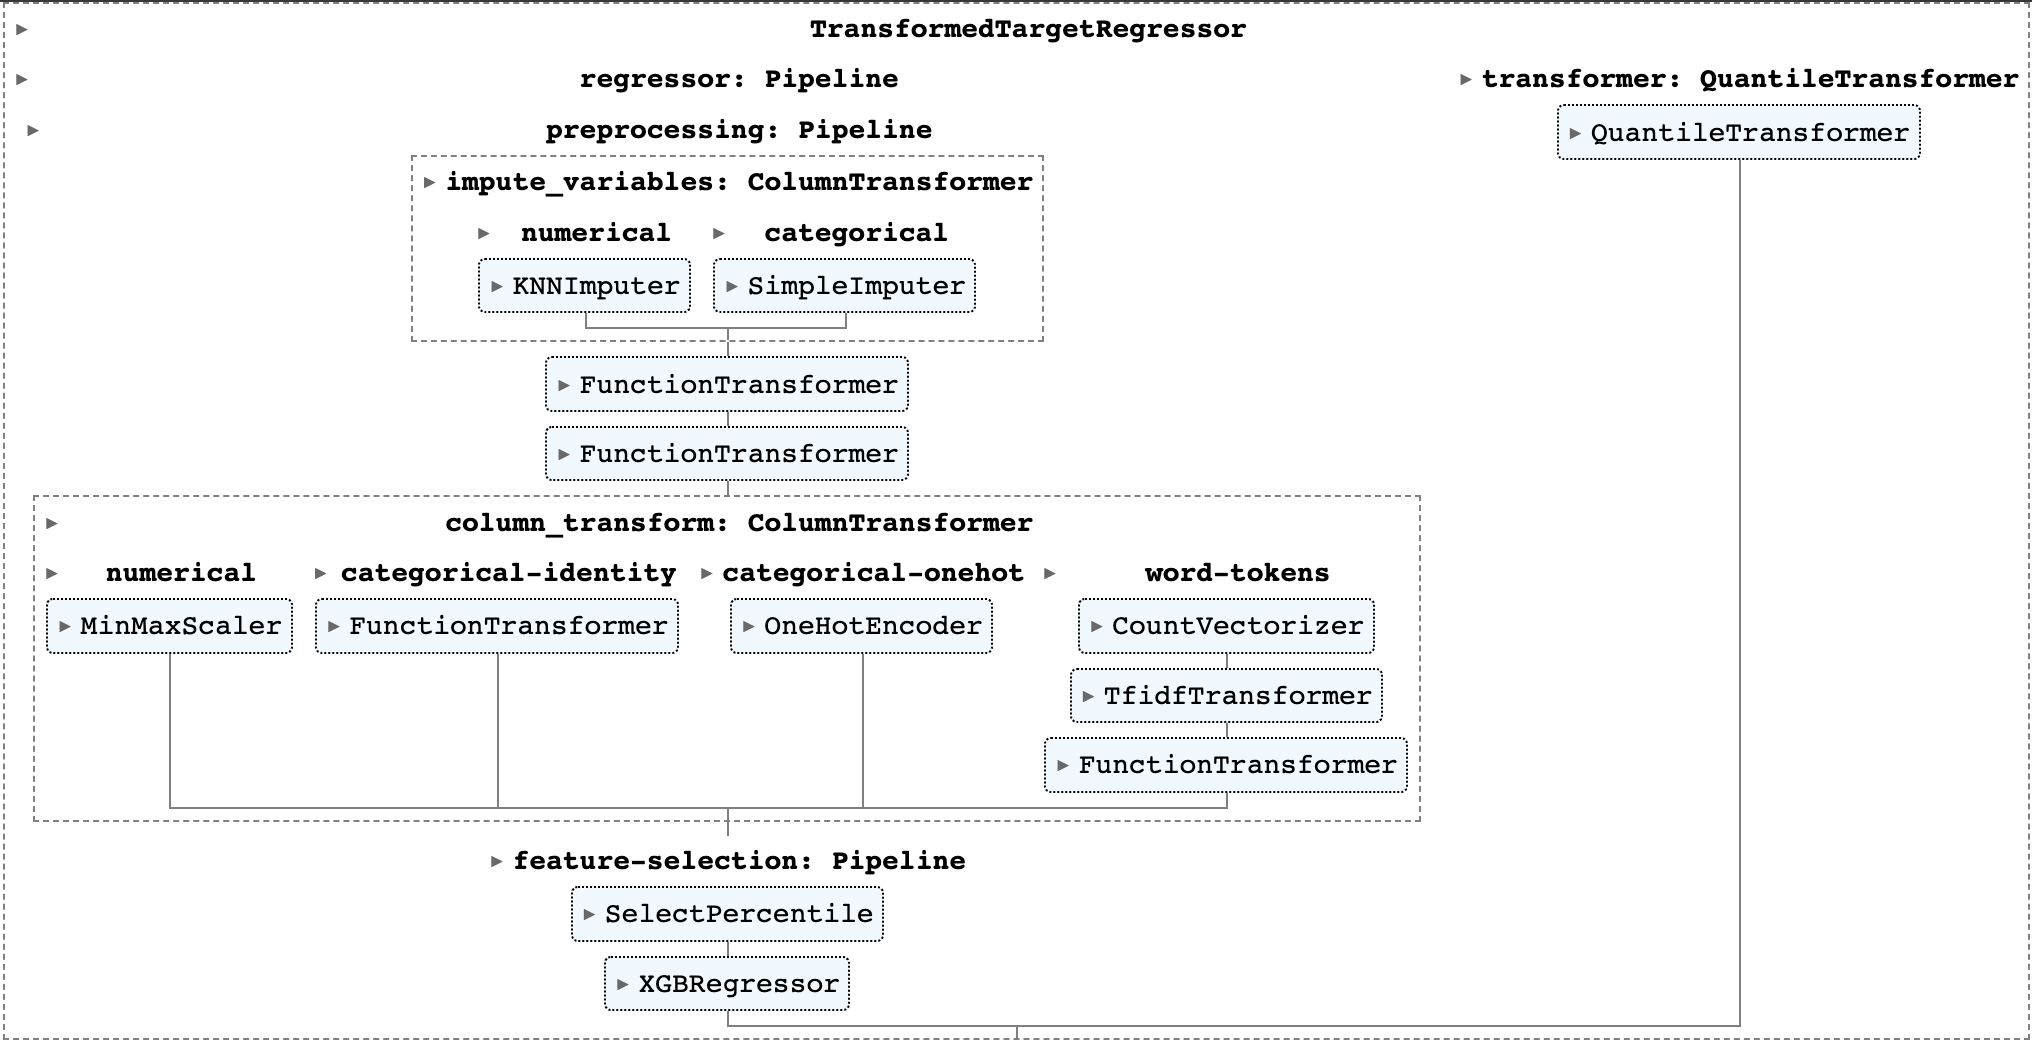

### Resolución

Para nuestro Baseline creamos un modelo simple y fácil de evaluar que permite ir midiendo la efectividad de innovaciones en el proceso de modelamiento. KNN cumple este propósito, siendo un modelo intuitivo en su funcionamiento y simple de correr.

Dentro de los modelos propuestos, evaluamos el funcionamiento de modelos basados en boosting, bagging, supor vector machine, y redes neuronales.

**Resultados**

Dentro de los experimentos realizados, logramos superar el baseline en >= 10 pts respecto a r2, y 8 pts en f1-score. Con los resultados entregados se logró además superar los baseline de la competencia.

Consideramos que estas son métricas
aceptables. No obstante, el cómo construimos la solución permite fácil buscar mejores resultados.

En cuanto a los problemas específicos, se debe tener en cuenta que el problema de calificación de un juego es complejo y subjetivo muchas veces, por lo que probablemente los aspectos que permitan la calificación de un juego no estén disponibles en los datos entregados de trabajo, y probablemente requiera de mayor conocimiento del negocio. En cuanto a la regresión, consideramos además que sería más adecuado evaluar el desempeño del modelo considerando una métrica de error, más que una métrica de ajuste.


---
## 2. Análisis Exploratorio de Datos

### 2.1 Descarga y lectura de datos

In [ ]:
%%capture
!wget https://raw.githubusercontent.com/alcazar90/sci-prog-lab/main/data/train.pickle
!wget https://raw.githubusercontent.com/alcazar90/sci-prog-lab/main/data/test.pickle

In [ ]:
df_train = pickle.load(open("train.pickle", "rb"))
print(f"Cantidad de registros antes de eliminar duplicados: {df_train.shape[0]}")
df_train = df_train.drop_duplicates()
print(f"Cantidad de registros luego de eliminar duplicados: {df_train.shape[0]}")
df_train.head()

Cantidad de registros antes de eliminar duplicados: 7881
Cantidad de registros luego de eliminar duplicados: 7881


name release_date  english                     developer  \
0      An Aspie Life   2018-03-29        1  Bradley Hennessey;Joe Watson   
1  GhostControl Inc.   2014-06-06        1                     bumblebee   
2            Deponia   2012-08-06        1        Daedalic Entertainment   
3      Atlas Reactor   2016-10-04        1                  Trion Worlds   
4            CHUCHEL   2018-03-07        1                Amanita Design   

                        publisher          platforms  required_age  \
0               EnderLost Studios            windows             0   
1  Application Systems Heidelberg  windows;mac;linux             0   
2          Daedalic Entertainment  windows;mac;linux             0   
3                    Trion Worlds            windows             0   
4                  Amanita Design        windows;mac             0   

                                          categories  \
0                   Single-player;Steam Achievements   
1  Single-player;Steam Achievements;Steam Trading...   
2  Single-player;Steam Achievements;Steam Trading...   
3  Multi-player;Online Multi-Player;Steam Achieve...   
4  Single-player;Steam Achievements;Steam Trading...   

                                           genres  \
0  Adventure;Casual;Free to Play;Indie;Simulation   
1                Casual;Indie;Simulation;Strategy   
2                                 Adventure;Indie   
3                           Free to Play;Strategy   
4                          Adventure;Casual;Indie   

                                tags  achievements  average_playtime  price  \
0       Free to Play;Adventure;Indie            23                 0   0.00   
1        Turn-Based;Indie;Simulation            53                65  10.99   
2     Adventure;Point & Click;Comedy            19               217   6.99   
3  Free to Play;Multiplayer;Strategy           121              1240   0.00   
4             Adventure;Indie;Casual             7               245   7.99   

                                   short_description  estimated_sells  \
0  One day your roommate Leaves for no reason. Yo...             3914   
1  Manage a team of ghosthunters and free London ...            10728   
2  In Deponia, the world has degenerated into a v...           635792   
3  SEASON 6 NOW LIVE! The battle for Atlas contin...           253864   
4  CHUCHEL is a comedy adventure game from the cr...            49818   

            rating  
0            Mixed  
1            Mixed  
2         Positive  
3         Positive  
4  Mostly Positive

### 2.2 Información de los datos

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7881 entries, 0 to 7880
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               7881 non-null   object  
 1   release_date       7881 non-null   object  
 2   english            7881 non-null   int64   
 3   developer          7881 non-null   object  
 4   publisher          7881 non-null   object  
 5   platforms          7881 non-null   object  
 6   required_age       7881 non-null   int64   
 7   categories         7881 non-null   object  
 8   genres             7881 non-null   object  
 9   tags               7881 non-null   object  
 10  achievements       7881 non-null   int64   
 11  average_playtime   7881 non-null   int64   
 12  price              7881 non-null   float64 
 13  short_description  7881 non-null   object  
 14  estimated_sells    7881 non-null   int64   
 15  rating             7881 non-null   category
dtypes: cat

Se observa que no se presentan datos nulos. **Importante, algunos datos serán procesados / codificados y/o se cambiará su tipo de dato para poder realizar su análisis**.

### 2.3 Pre procesamiento de datos

Antes de realizar el análisis exploratorio, se aplicará los siguientes tratamientos:
- Se utilizará el campo `release_date` para crear la columna `release_month`, las cual se tratará como un atributo categórico. El año no se considera relevante, ya que para fines predictivos se asume que próximos juegos siempre se lanzarán en años futuros.
- Se creará columnas binarias para cada categoría de las columnas `developer`, `platforms`, `categories`, `genres` y `tags`, para así analizar valores más frecuentes, y poder utilizar estos valores como atributos del modelo.
- Se corrobora que cada registro tiene un `name` diferente (para luego eliminar este atributo en el pipeline de entrenamiento).
- Se realizará una bolsa de palabras con CountVectorizer para la columna `short_description`, para explorar las palabras más frecuentes. Esto no se incluye en la función de procesamiento, ya que se incorporará luego en el pipeline como un paso diferente.
- Se explorará una proyección 2-D de los datos usando UMAP.

**Pre procesamiento developer**

In [ ]:
# Se explora developers
vc = df_train["developer"].str.split(";").explode().str.lower().value_counts()
print(f"Cant. developers diferentes: "
f"{len(df_train['developer'].str.split(';').explode().str.lower().unique())}\n")
vc.head(5)

Cant. developers diferentes: 5583



feral interactive (mac)       41
koei tecmo games co., ltd.    35
square enix                   28
valve                         23
ubisoft montreal              22
Name: developer, dtype: int64

Para `developer` se creará columnas para los 5 más frecuentes, y la columna `developer_other` para el resto (se cuenta con 5.583 desarrolladores diferentes en el entrenamiento). Si un juego tiene como desarrollador uno de los 5 más frecuentes, y además "otro", solo se considera el valor del desarrollador frecuente. Si un juego tiene más de un desarrollador "otro", sólo se considera 1 (columna binaria).

In [ ]:
# Se agrega los 5 más frecuentes "en duro" a la función de procesamiento
vc.head().index

Index(['feral interactive (mac)', 'koei tecmo games co., ltd.', 'square enix',
       'valve', 'ubisoft montreal'],
      dtype='object')

**Pre procesamiento platforms**

In [ ]:
# Se explora platforms
vc = df_train["platforms"].str.split(";").explode().str.lower().value_counts()
print(f"Cant. platforms diferentes: "
f"{len(df_train['platforms'].str.split(';').explode().str.lower().unique())}\n")
vc.head(5)

Cant. platforms diferentes: 3



windows    7880
mac        3125
linux      2173
Name: platforms, dtype: int64

Para el caso de `platforms` se creará columnas binarias para `linux` y `mac`. Solo hay 1 juego que no está disponible para `windows`; No se crea columna para esta plataforma, debido a su bajísima variabilidad. 

**Pre procesamiento categories**

In [ ]:
# Se explora categories
vc = df_train["categories"].str.split(";").explode().str.lower().value_counts()
print(f"Cant. categories diferentes: "
f"{len(df_train['categories'].str.split(';').explode().str.lower().unique())}\n")
vc.head(10)

Cant. categories diferentes: 29



single-player                 7310
steam achievements            5061
steam trading cards           4140
steam cloud                   3164
full controller support       2150
multi-player                  1881
partial controller support    1427
steam leaderboards            1277
online multi-player           1020
co-op                          830
Name: categories, dtype: int64

Para `categories` se aplica la misma lógica anterior, pero considerando las 10 categorías más frecuentes (se tiene 29 categorías diferentes).

In [ ]:
# Se agrega los 10 más frecuentes "en duro" a la función de procesamiento
vc.head(10).index

Index(['single-player', 'steam achievements', 'steam trading cards',
       'steam cloud', 'full controller support', 'multi-player',
       'partial controller support', 'steam leaderboards',
       'online multi-player', 'co-op'],
      dtype='object')

**Pre procesamiento genres**

In [ ]:
# Se explora genres
vc_genres = df_train["genres"].str.split(";").explode().str.lower().value_counts()
print(f"Cant. genres diferentes: "
f"{len(df_train['genres'].str.split(';').explode().str.lower().unique())}\n")
vc_genres.head(10)

Cant. genres diferentes: 26



indie                    5112
action                   3629
adventure                2977
casual                   1977
strategy                 1740
rpg                      1630
simulation               1601
free to play              879
early access              647
massively multiplayer     387
Name: genres, dtype: int64

Para `genres` se aplica la misma lógica anterior, pero considerando los 10 géneros más frecuentes (se tiene 26 géneros diferentes).

In [ ]:
# Se agrega los 10 más frecuentes "en duro" a la función de procesamiento
vc_genres.head(10).index

Index(['indie', 'action', 'adventure', 'casual', 'strategy', 'rpg',
       'simulation', 'free to play', 'early access', 'massively multiplayer'],
      dtype='object')

**Pre procesamiento tags**

Para el caso de `tags` se realiza
un análisis multivariado para ver si se encuentra alguna señal
respecto a la variable de respuesta `ratings`, usando información de 
categorías en `tags` + `genres`, versus solo `genres`. Se crea columnas para aquellos `tags` frecuentes que son diferentes a `genres`.

En el preprocesamiento anterior, se encontraron 26 categorías únicas en la
variable `genres`. En esta sección, contrastaremos las categorías de `genre`
con las de `tags` para responder las siguientes preguntas:

* ¿Cuántas categorías únicas hay en `tags`?
* ¿Cuántas categorías de `tags` no están en `genres`?
* ¿Cuántos registros hay en estas categorías exclusivas dentro de `tags`?

In [ ]:
# Se explora tags
tag_cats = df_train["tags"].str.split(";").explode().str.lower().value_counts()
print(f"Cant. de tags diferentes: {len(tag_cats.index)}")
tag_cats.head(10)

Cant. de tags diferentes: 306


indie           3489
action          2590
adventure       1826
strategy        1279
casual          1265
rpg             1025
simulation       995
free to play     868
early access     648
anime            352
Name: tags, dtype: int64

Hay un total de 306 categorías en la columna `tags` versus las 26 que se
encuentran en `genres`. No obstante, si comparamos el top 10 en frecuencias
, la mayoría de las categorías son redundantes. Exploremos en mayor profundidad las categorías que NO se encuentran en la columna `genres`, para ver si podemos encontrar alguna señal importante, 
respecto a las variables de respuesta de los problemas a resolver.
* Se realizo un análisis sobre el top 20 de las categorías exclusivas para
ver como cambian algunas variables númericas si se consideran en conjunto
con las categorías de genero, versus solo usar el genero. Especificamente,
estudiamos el impacto sobre los grupos de la variable de respuesta _ratings_.
* Hay 3202 registros de 7881 que tiene alguna de los top 20 categorías exclusivas de `tag`.

Cant. de categorías en tag que no están en genre: 280


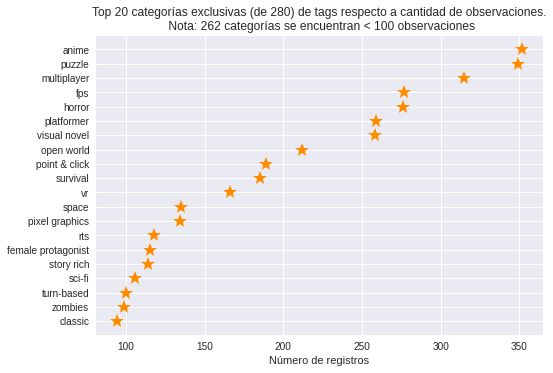

In [ ]:
exclusive_tag_cats = tag_cats.index.difference(vc_genres.index)
exclusive_tag = tag_cats[exclusive_tag_cats].sort_values(ascending=False)[:20]
print(f"Cant. de categorías en tag que no están en genre: {len(exclusive_tag_cats)}")
plt.plot(exclusive_tag.values, exclusive_tag.index, "*", ms=15, color="darkorange");
plt.gca().invert_yaxis()
plt.xlabel("Número de registros");
plt.title(f"Top 20 categorías exclusivas (de {len(exclusive_tag_cats)}) de tags respecto a cantidad de observaciones.\n Nota: 262 categorías se encuentran < 100 observaciones");

La categoría top 1 de las exclusivas (_anime_) solo cuenta con 350 observaciones, eso es cerca de un 4.5% del total de registros que disponemos
en el _dataset_ (7.881). Sin embargo, algunas de estas categorías puede que 
todavía contengan una señal relevante para las variables de respuesta, si las analizamos en el contexto dentro de otras categorías. Dado este análisis se crea columnas para los 5 tags con mayor presencia, que difieren de genres.


**Se corrobora que los nombres son únicos**

In [ ]:
assert df_train["name"].nunique() == df_train.shape[0]

Dado todo el análisis previo, se crea una primera función de procesamiento, que permitirá realizar el análisis exploratorio. De todas formas, luego esta función se incluirá dentro del Pipeline de entrenamiento de los modelos.

In [ ]:
def data_proc(dataframe):
  df_proc = dataframe.copy()

  if 'categorical__release_date' in df_proc.columns:
  # NOTA: esto es por algo del pipeline al imputar y recibir el dataframe con
  # un prefijo en los nombres que rompe todo
    col_names = [col.replace('numerical__', '') for col in df_proc.columns]
    col_names = [col.replace('categorical__', '') for col in col_names]
    df_proc.columns = col_names
    assert "release_date" in df_proc.columns, "problemas con nombre"


  # Obtención del mes
  df_proc["release_month"] = (
      pd.to_datetime(df_proc["release_date"]).dt.strftime('%b')
  ).astype("category")

  # Columnas developer
  devs_frecuentes = ['feral interactive \(mac\)', 'koei tecmo games co., ltd.',
                     'square enix', 'valve', 'ubisoft montreal']
  devs_cols = [
      f"developer_{c}"
      for c in pd.Series(devs_frecuentes).replace(
          [r" ", r"\(", r"\)", r"\.", r"\,", r"\\"], ["_", "", "", "", "", ""],
          regex=True
      )
  ]

  for i in range(len(devs_frecuentes)):
    df_proc[devs_cols[i]] = np.where(
        df_proc["developer"].str.lower().str.contains(devs_frecuentes[i]), 1, 0
    )

  df_proc["developer_other"] = np.where(
      df_proc[devs_cols].sum(axis=1) > 0, 0, 1
  )

  # Columna platforms
  platform_cols = ["mac", "linux"]

  for c in platform_cols:
    df_proc[f"platform_{c}"] = np.where(
        df_proc["platforms"].str.lower().str.contains(c),
        1, 0
    )

  # Columnas categories
  categories_frecuentes = ['single-player', 'steam achievements',
                           'steam trading cards', 'steam cloud',
                           'full controller support', 'multi-player',
                           'partial controller support', 'steam leaderboards',
                           'online multi-player', 'co-op']

  categories_cols = [
      f"category_{c}"
      for c in pd.Series(categories_frecuentes).replace(
          [r" ", r"-"], ["_", ""], regex=True
      )
  ]

  for i in range(len(categories_frecuentes)):
    df_proc[categories_cols[i]] = np.where(
        df_proc["categories"].str.lower().str.contains(categories_frecuentes[i]),
        1, 0
    )

  df_proc["category_other"] = np.where(
      df_proc[categories_cols].sum(axis=1) > 0, 0, 1
  )

  # Columnas genres
  genres_frecuentes = ['indie', 'action', 'adventure', 'casual', 'strategy',
                       'rpg', 'simulation', 'free to play', 'early access',
                       'massively multiplayer']

  genres_cols = [
      f"genre_{c}"
      for c in pd.Series(genres_frecuentes).replace(
          [r" "], ["_"], regex=True
      )
  ]

  for i in range(len(genres_frecuentes)):
    df_proc[genres_cols[i]] = np.where(
        df_proc["genres"].str.lower().str.contains(genres_frecuentes[i]),
        1, 0
    )

  df_proc["genre_other"] = np.where(
      df_proc[genres_cols].sum(axis=1) > 0, 0, 1
  )

  # Columnas tags
  tags_frecuentes = ['anime', 'puzzle', 'multiplayer', 'fps', 'horror']

  for i in range(len(tags_frecuentes)):
    df_proc[f"tag_{tags_frecuentes[i]}"] = np.where(
        df_proc["tags"].str.lower().str.contains(tags_frecuentes[i]),
        1, 0
    )

  return df_proc.drop(columns=["release_date", "developer", "categories",
                               "genres", "tags", "platforms", "name"])

In [ ]:
# Se aplica procesamiento para exploración
df_proc = data_proc(df_train)
df_proc.head()

english                       publisher  required_age  achievements  \
0        1               EnderLost Studios             0            23   
1        1  Application Systems Heidelberg             0            53   
2        1          Daedalic Entertainment             0            19   
3        1                    Trion Worlds             0           121   
4        1                  Amanita Design             0             7   

   average_playtime  price                                  short_description  \
0                 0   0.00  One day your roommate Leaves for no reason. Yo...   
1                65  10.99  Manage a team of ghosthunters and free London ...   
2               217   6.99  In Deponia, the world has degenerated into a v...   
3              1240   0.00  SEASON 6 NOW LIVE! The battle for Atlas contin...   
4               245   7.99  CHUCHEL is a comedy adventure game from the cr...   

   estimated_sells           rating release_month  ...  genre_simulation  \
0             3914            Mixed           Mar  ...                 1   
1            10728            Mixed           Jun  ...                 1   
2           635792         Positive           Aug  ...                 0   
3           253864         Positive           Oct  ...                 0   
4            49818  Mostly Positive           Mar  ...                 0   

   genre_free_to_play  genre_early_access  genre_massively_multiplayer  \
0                   1                   0                            0   
1                   0                   0                            0   
2                   0                   0                            0   
3                   1                   0                            0   
4                   0                   0                            0   

   genre_other  tag_anime  tag_puzzle  tag_multiplayer  tag_fps  tag_horror  
0            0          0           0                0        0           0  
1            0          0           0                0        0           0  
2            0          0           0                0        0           0  
3            0          0           0                1        0           0  
4            0          0           0                0        0           0  

[5 rows x 45 columns]

### 2.4 Análisis columnas numéricas



**Análisis univariado**

Se explora los estadísticos, y la distribución de estos atributos en escala logarítimica, debido a su alto sesgo. En conjunto con ello se agrega un gráfico de caja con la distribución original de los datos.

In [ ]:
df_num = df_proc[["achievements", "average_playtime", "price", "estimated_sells"]]

In [ ]:
df_num.describe().round()

achievements  average_playtime   price  estimated_sells
count        7881.0            7881.0  7881.0           7881.0
mean           43.0             439.0     8.0         210577.0
std           265.0            3303.0     9.0        1513926.0
min             0.0               0.0     0.0           3600.0
25%             0.0               0.0     2.0           9724.0
50%            15.0              27.0     7.0          21508.0
75%            35.0             251.0    11.0          73573.0
max          9821.0          190625.0    79.0       79441294.0

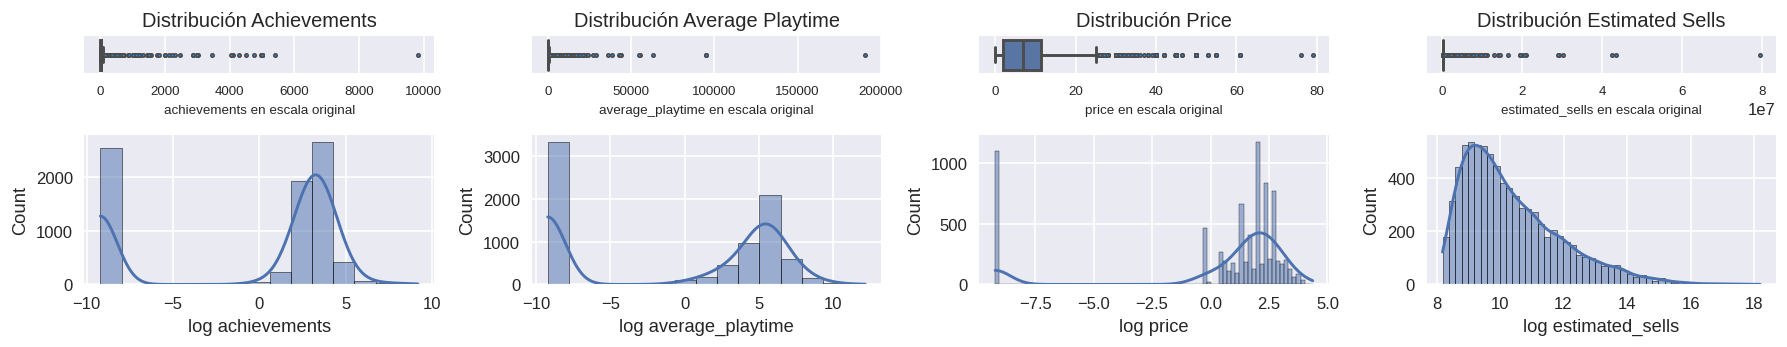

In [ ]:
_, axes = plt.subplots(2, 4, figsize=(15, 3), sharey=False, sharex=False,
                       dpi=120,
                       gridspec_kw={"height_ratios": (.1, .4)})
flat_axes = axes.ravel()

for i, c in enumerate(df_num.columns):
  data = np.log(df_num[c] + 0.0001)
  sns.boxplot(x=df_num[c], ax=flat_axes[i],
              flierprops={"markersize":2, "linewidth": 0,
                          "markerfacecolor":"dodgerblue", "marker":"o",
                          "color": "dodgerblue"})
  sns.histplot(x=data, kde=True, ax=flat_axes[i+4])
  flat_axes[i].set_title(f"Distribución {c.replace('_', ' ').title()}")
  flat_axes[i].set_xlabel(f"{c} en escala original", size=8)
  flat_axes[i+4].set_xlabel(f"log {c}")
  flat_axes[i].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()

**Comentarios estadísticos y gráficos univariados**

Las 4 variables presentan una gran cantidad de outliers, destacando las modas en el valor mínimo (0 en escala normal) para `achievements`, `average_playtime` y `price`. Si bien es posible un juego no tenga achievements y que sea gratis, se nos hace extraño los juegos sin tiempo de juego. Esto podría indicar que el juego no tiene un límite de tiempo de juego, que éste valor no se ha estimado, que el juego no requiere de supervisión y se juega en forma automática, etc. Por el momento se decide conservar esta variable, pero es candidata a ser eliminada debido a la incertidumbre en su interpretación.

En concreto, respecto del vector objetivo `estimated_sells`, su distribución presenta un sesgo, incluso en escala logarítimica, habiendo pocos juegos con cantidades de ventas muy altas. Esto se corrobora con el análisis de estadísticos, donde el promedio es mayor al percentil 75% y se presenta una gran desviación estándar. Esto se deberá tener en cuenta para el modelo predictivo; Puede que el desempeño sea peor en juegos de ventas muy altas, ya que se tienen pocos ejemplos en ese rango.


**Análisis multivariado**

Se explora las relaciones entre las variables considerando el vector objetivo de rating.

Por último, se explora las correlaciones entre ellas, utilizando la correlación de spearman, ya que las variables no siguen una distribución normal.

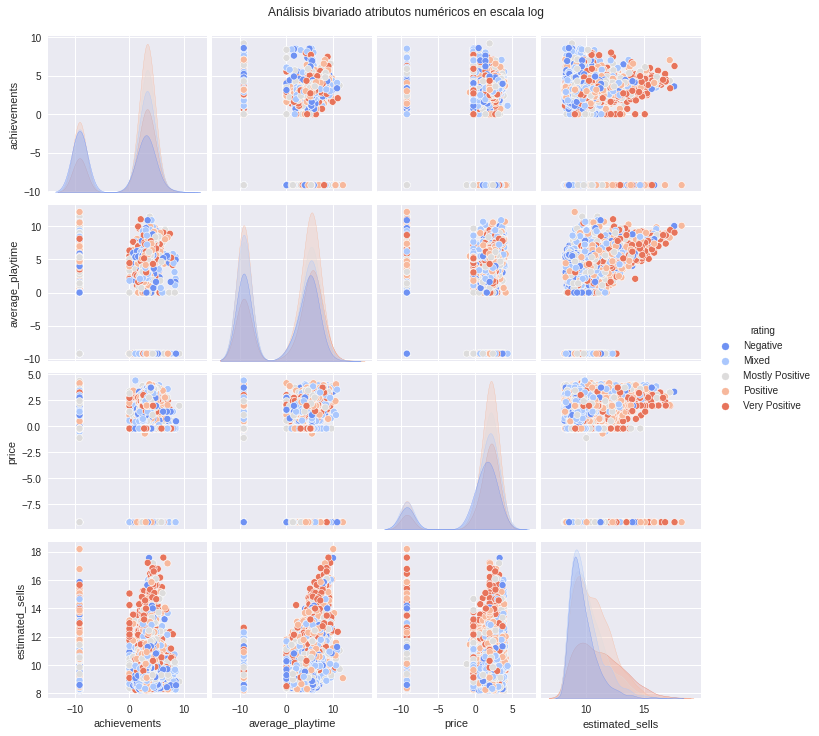

In [ ]:
g = sns.pairplot(
    pd.concat([df_num.apply(lambda x: np.log(x + 0.0001)),
               df_proc[["rating"]]], axis=1),
    hue="rating", palette="coolwarm");
g.fig.suptitle("Análisis bivariado atributos numéricos en escala log", y=1.02);

**Comentarios análisis multivariado**

En cuando al vector objetivo de la estimación de ventas, considerando los atributos en escala logarítimica, no se observa una relación clara; Solo en el caso de `average_playtime` se observa una leve tendencia al alza en las ventas a mayor tiempo de juego.

En cuanto al vector objetivo de rating, no se ve una tendencia ni relación clara entre combinaciones de atributos y el rating. Al considerar cada atributo individualmente, se aprecia que los juegos con calificación positiva tienen mayor precio, mayor tiempo de juego, y mayor cantidad de logros.

Por otro lado, sí se aprecia una relación entre ambos vectores objetivo, observándose una relación positiva entre ambos. Sin embargo, cada problema se trata de forma independiente, y el vector objetivo de un problema no se utiliza para el otro (no se puede saber el rating antes de que salga el juego, ni su cantidad de ventas, por lo que no se pueden usar como predictores).

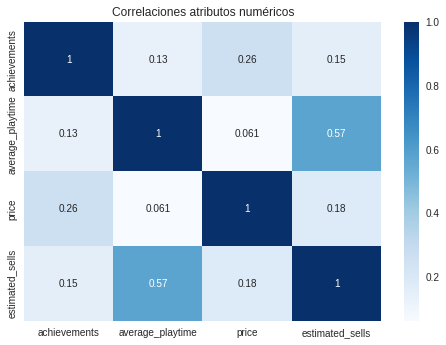

In [ ]:
sns.heatmap(df_num.corr(method="spearman"), annot=True, cmap="Blues");
plt.title("Correlaciones atributos numéricos");

**Comentarios correlaciones**

Se observa que los atributos entre sí tienen baja correlación, lo cual es bueno, ya que entrega mayor variabilidad de información al modelo. Por otro lado, también tienen una baja correlación con el vector objetivo de cantidad de ventas, por lo que podrían ser no muy buenos predictores. La única con una leve correlación positiva con las ventas, aunque baja, es el tiempo de juego, que es una variable de la cual no se tiene claro su interpretabilidad.

### 2.5 Análisis columnas categóricas


**Análisis univariado**

En forma univariada solo se observa la distribución de frecuencias del vector objetivo "rating".

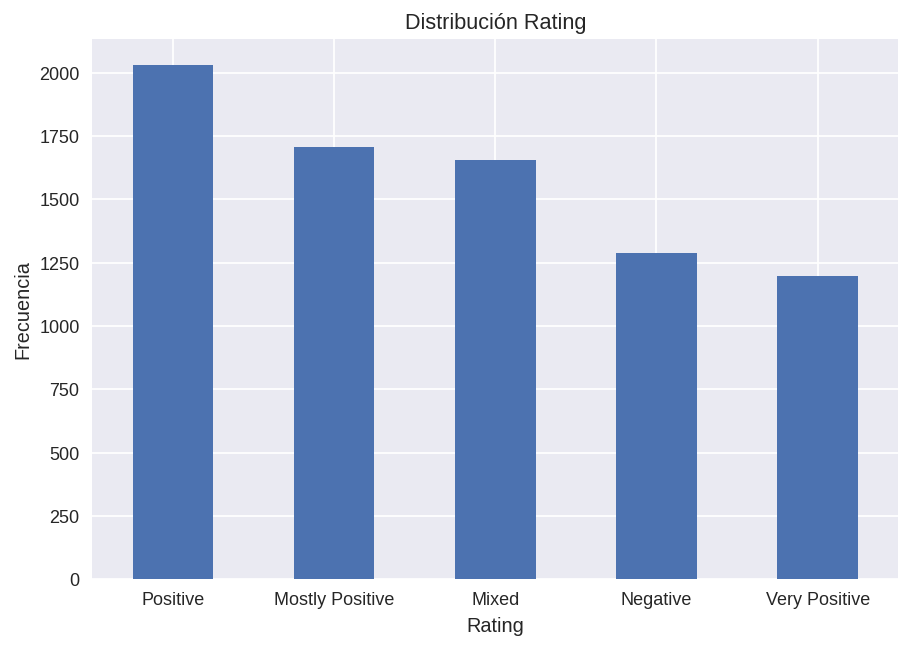

In [ ]:
plt.figure(dpi=130)
df_proc["rating"].value_counts().plot(kind="bar");
plt.xticks(rotation=0);
plt.ylabel("Frecuencia");
plt.xlabel("Rating");
plt.title("Distribución Rating");

**Comentarios rating**

Las categorías se encuentran relativamente balanceadas, siendo la mayor presencia de juegos con calificación Positive, y la menor para juegos con calificación Very Positive.

**Análisis multivariados**

- Se analiza primero las frecuencias de variables categóricas con más de un valor posible por registro, considerando los distintos `rating`.


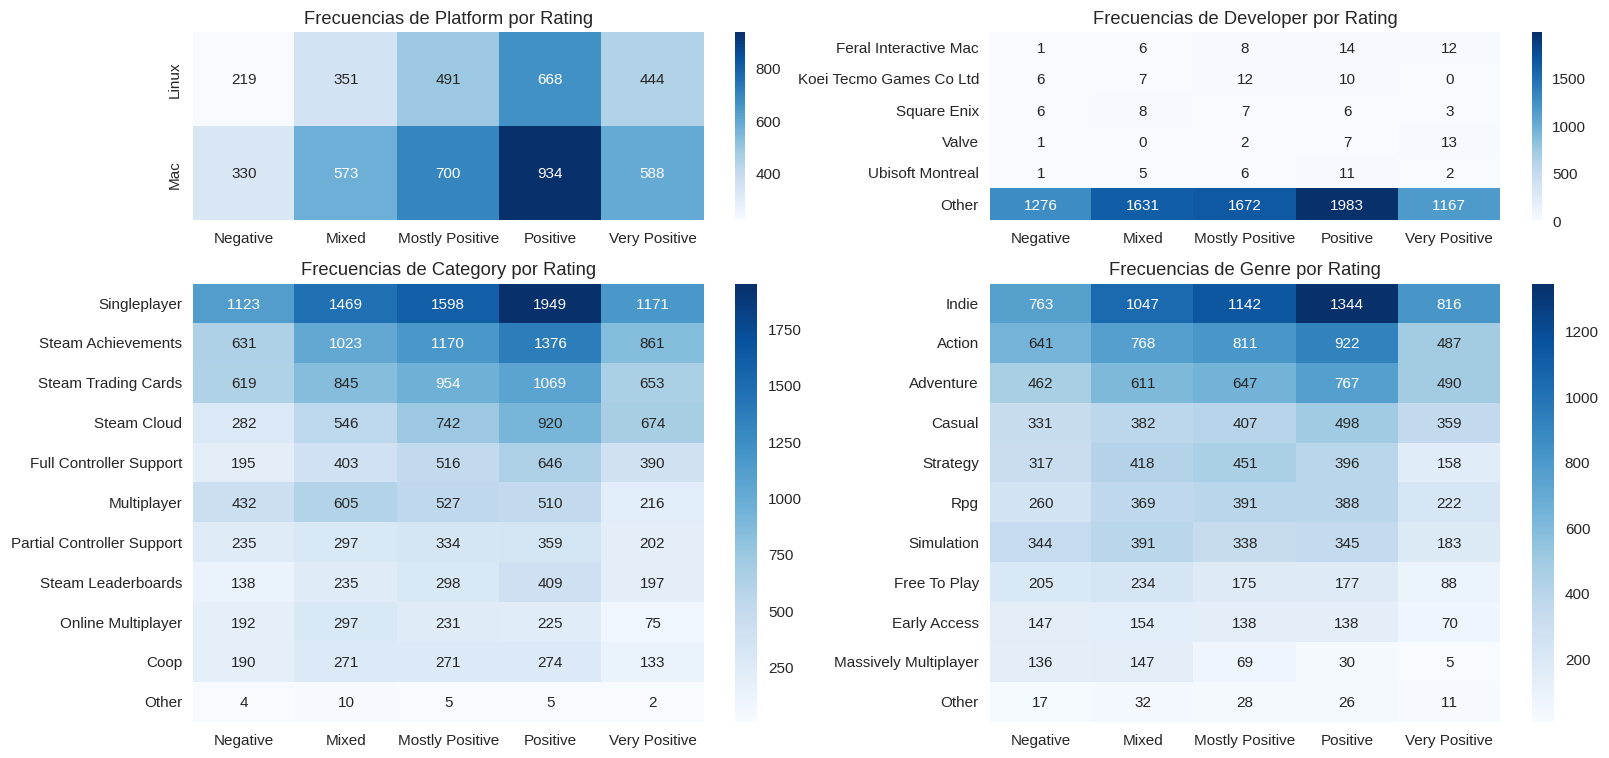

In [ ]:
# Relación con rating
cols_platforms = [
    "platform_linux", "platform_mac", "rating", "estimated_sells"
]
cols_developer = [
    'developer_feral_interactive_mac','developer_koei_tecmo_games_co_ltd',
    'developer_square_enix', 'developer_valve', 'developer_ubisoft_montreal',
    'developer_other', "rating", "estimated_sells"
]
cols_category = [
    'category_singleplayer', 'category_steam_achievements',
    'category_steam_trading_cards', 'category_steam_cloud',
    'category_full_controller_support', 'category_multiplayer',
    'category_partial_controller_support', 'category_steam_leaderboards',
    'category_online_multiplayer', 'category_coop', 'category_other', "rating",
    "estimated_sells"
]
cols_genre = [
    'genre_indie', 'genre_action', 'genre_adventure', 'genre_casual',
    'genre_strategy', 'genre_rpg', 'genre_simulation', 'genre_free_to_play',
    'genre_early_access', 'genre_massively_multiplayer', 'genre_other',
    "rating", "estimated_sells"
]

platforms = df_proc[cols_platforms]
developer = df_proc[cols_developer]
category = df_proc[cols_category]
genre = df_proc[cols_genre]


cat_df = [platforms, developer, category, genre]
titulos = ["platform", "developer", "category", "genre"]

_, axes = plt.subplots(2, 2, sharey=False, sharex=False,figsize=(15, 7),
                       dpi=110, gridspec_kw={"height_ratios": (.3, .7)})
axes = axes.flatten()

for i, df in enumerate(cat_df):
  axes[i].set_title(f"Frecuencias de {titulos[i].title()} por Rating")
  t = df.groupby(["rating"]).agg({
      i:'sum'
      for i in df.columns[:-2]
  })
  t.columns = [
      c.split(f"{titulos[i]}_")[1].replace("_", " ").title()
      for c in t.columns
  ]
  sns.heatmap(t.T, cmap="Blues", annot=True, fmt="g", ax=axes[i]);
  axes[i].set_xlabel("")

  plt.tight_layout();

- También se explora la distribución de `estimated_sells` en relación a estas variables. Debido al gran sesgo de este vector objetivo, se convierte a escala logarítimica para facilitar la exploración.

**Nota**: Se muestra solo la clase positiva, para evitar redundancia de información, ya que la clase 0 en cada atributo corresponde a su complemento.


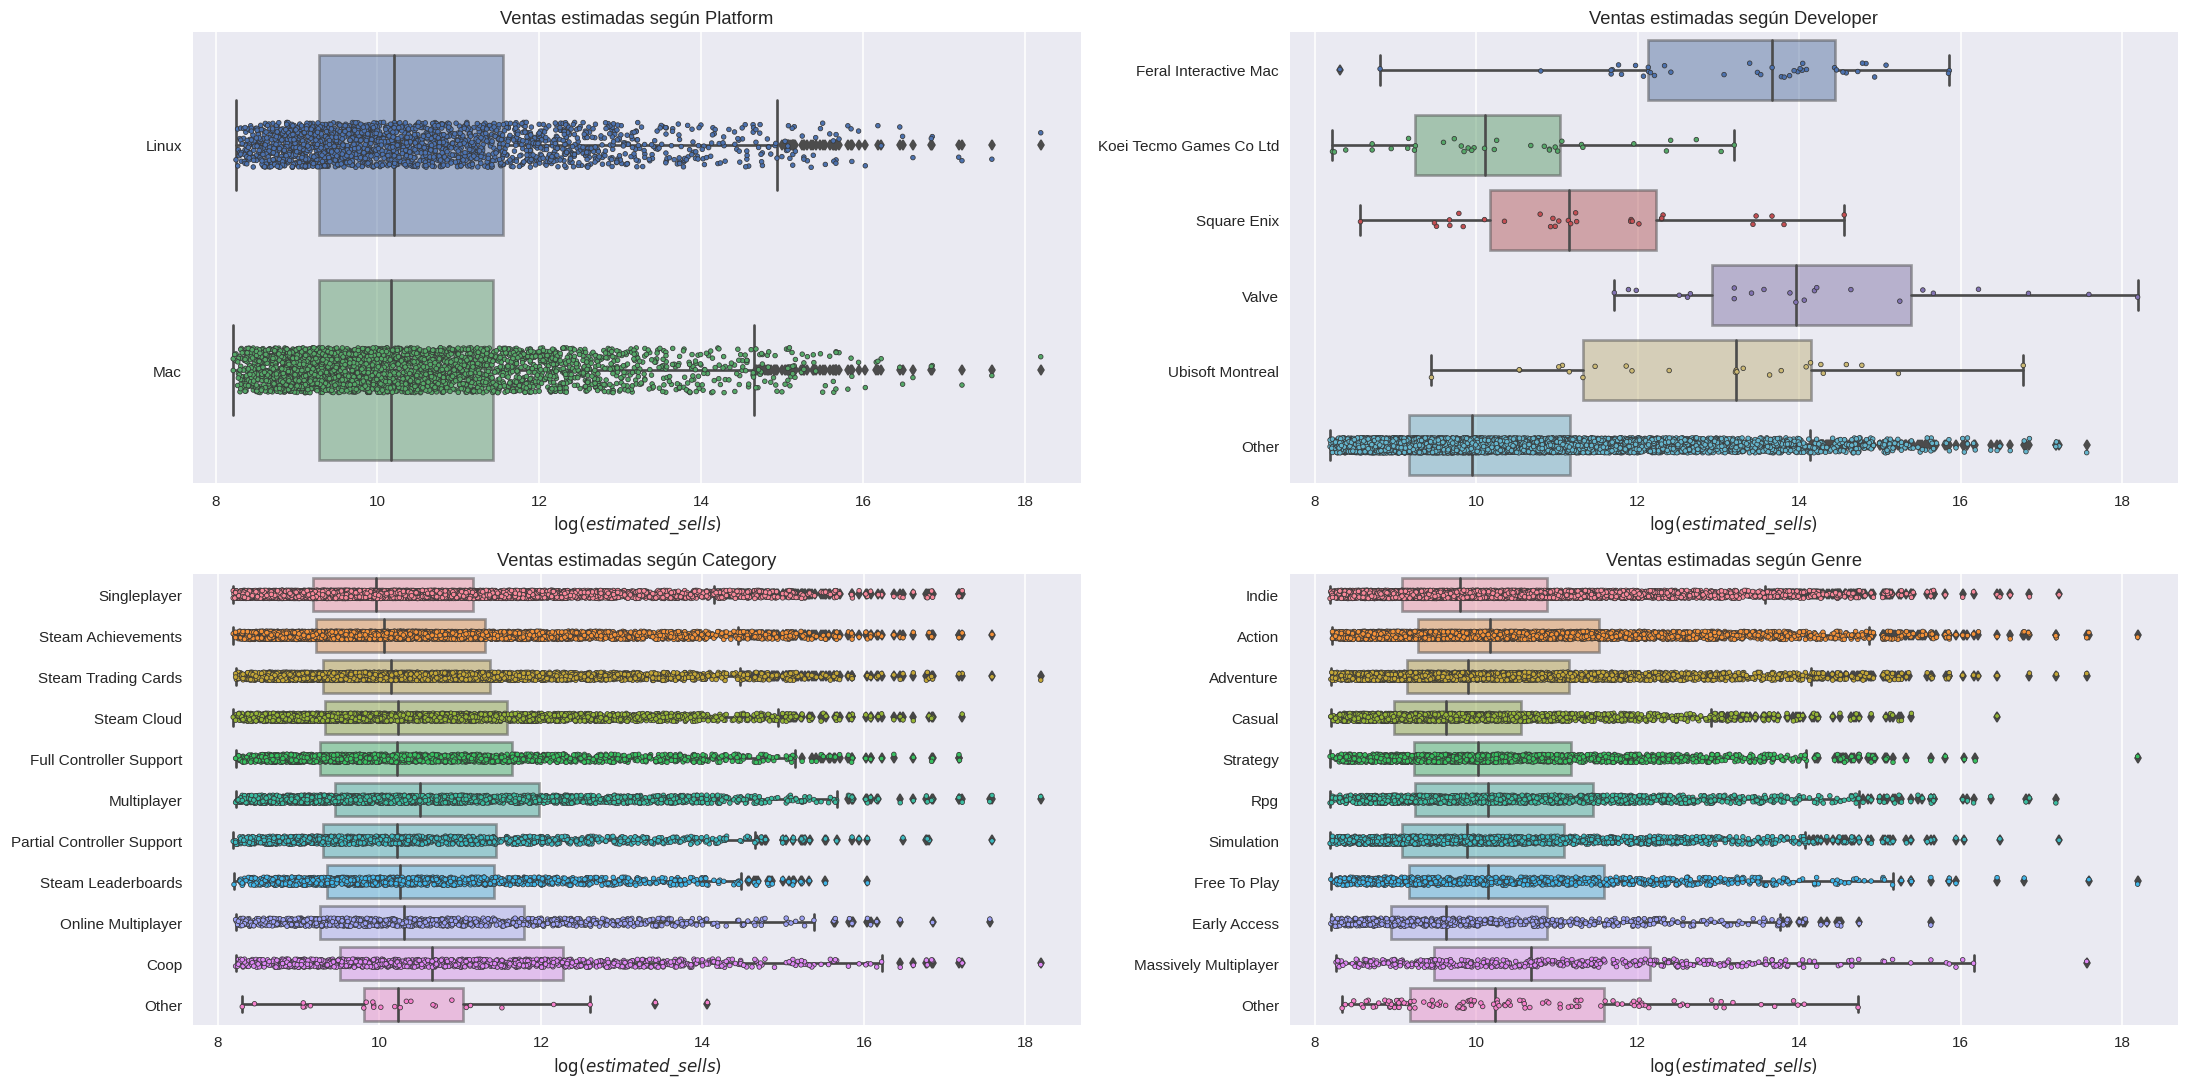

In [ ]:
# Relación con estimated_sells
_, axes = plt.subplots(2, 2, figsize=(20, 10), dpi=110)
axes = axes.flatten()

for i, d in enumerate([cols_platforms[:-2], cols_developer[:-2],
                       cols_category[:-2], cols_genre[:-2]]):
  for j, c in enumerate(d):
    largo = len(d)

    sns.stripplot(x=np.log(df_proc["estimated_sells"] + 0.001),
                y=df_proc[c].replace([0, 1], [largo + 1, j]),
                order=range(largo), ax=axes[i], orient="h",
                edgecolor='#373737', linewidth=0.5, size=3);
    sns.boxplot(x=np.log(df_proc["estimated_sells"] + 0.001),
                y=df_proc[c].replace([0, 1], [largo + 1, j]),
                order=range(largo), ax=axes[i], orient="h",
                boxprops={"alpha": 0.5});

    axes[i].set_yticklabels([
        x.split(f"{titulos[i]}_")[1].replace("_", " ").title()
        for x in d
      ])
    axes[i].set_title(f"Ventas estimadas según {titulos[i].title()}");
    axes[i].set_ylabel("");
    axes[i].set_xlabel(r"$\log(estimated\_sells)$")

plt.tight_layout();

**Comentarios frecuencias variables con más de una categoría presente**

En todos los casos, se observa una mayor frecuencia de juegos con rating "Positive". En cuanto a los atributos individuales, la plataforma de mayor presencia es mac, no hay un developer con una frecuencia relativamente mayor al resto, la categoría de juego de mayor frecuencia es de jugador único, y el género de juego de mayor frecuencia es indie. Dado que para el caso de `developer` no se aprecia diferencias substanciales entre `rating`, habiendo muy pocos casos en cada combinación, estas categorías podrían ser malos predictores para este vector objetivo. Lo mismo aplica para las 7 categorías y géneros menos frecuentes, además de los `other`.

En relación a las ventas estimadas, se ve gran diferencia de la distribución de este valor dependiendo del desarrollador, aunque existe baja frecuencia de casos para cada uno. Donde no se aprecia diferencia es en el caso de la plataforma, por lo que estas categorías podrían no ser buenos predictores para el vector objetivo de `estimated_sells`.

- En forma especial se analiza también la variable `tags`.

¿Hay alguna diferencia relevante entre disponer de estas 
categorías versus solo usar las que se encuentran en `genres` para 
variables como promedio de horas de juego o precio?

Comenzemos filtrando los títulos de juegos que tengan categorías
en `tags` dentro de las `exclusive_tag`.

In [ ]:
game_exclusive_tags = (
        df_train["tags"]
          .str.split(";")
          .explode()
          .str.lower()
          .isin(exclusive_tag.index)
          .groupby(level=0)
          .sum() > 0
    )

print(f"Un total de {sum(game_exclusive_tags)} juegos tienen alguna de estas categorías exclusivas")

Un total de 3202 juegos tienen alguna de estas categorías exclusivas


La misma categoría top 1 de las exclusivas (_anime_), que se reportaba en un 
4.5% de los registros totales, si lo vemos ahora solo dentro del genero "adventure", tiene una participación de 11%.

Ahora contrastamos como cambian algunas variables númericas (e.g. price, average_playtime) cuando vemos los rating según una categoría de genero 
particular, versus disponer para cada genero los subgrupos con las categorías
exclusivas top 5 dentro de `tags`.

In [ ]:
#@title
def avg_per_catplot(df, ax, num_var="price", genre_cat="genre_indie", annot=True):
  """
     Gráfico de calor con promedio de variable num_var para una
     categoría de genre_cat dada, abierto por subcategorias de tag 
     y rating. Se puede comparar tambien el promedio del genero
     por rating.

     Ejemplo, genre_cat="genre_indie", num_var="price", se visualiza
     los precios de juegos promedios por ranting dentro del genero
     "genre_indie" (etiquetas rating). Además, se puede observar
     como varía ese promedio de rating por genero, cuando consideramos
     las top 20 categorías tag que no se repiten en las categorías de
     genero.
  """
  by_genre = df[df[genre_cat] == 1]

  # computa promedio gobal categoría rating
  avg_by_rating = by_genre.groupby("rating").mean()[num_var].round(1)

  sns.heatmap(
      # Se computa el metrica (e.g. precio promedio) entre dos varialbes categoricas
      # la que se agrupa (e.g. rating) y otra en forma de columna dummy (e.g. tag_anime)
      by_genre.groupby("rating")
      .agg({
        i: (lambda x: (round(by_genre[by_genre.index.isin(x.index)].loc[x == 1, num_var].mean(), 1)))
        for i in [col for col in by_genre if col.startswith("tag_")]
      })
      # Se agrega promedio global por categoría rating en las etiquetas
      .rename(index={"Negative": f"Negative\n({avg_by_rating['Negative']})",
                    "Mixed": f"Mixed\n({avg_by_rating['Mixed']})",
                    "Mostly Positive": f"Mostly Positive\n({avg_by_rating['Mostly Positive']})",
                    "Positive": f"Positive\n({avg_by_rating['Positive']})",
                    "Very Positive": f"Very Positive\n({avg_by_rating['Very Positive']})"
                    })
      .T, 
      cmap="Blues", annot=annot, fmt="g", ax=ax
  )

  ax.set_xlabel("Categorías de rating\n (promedio por categorías de rating solo considerando el genero)")
  ax.set_title(f"Promedio de la variable {num_var} dado el genero de\n juego {genre_cat}según  los grupos tags y rating\n", loc="left");

Observemos el precio para algunas de las categorias.

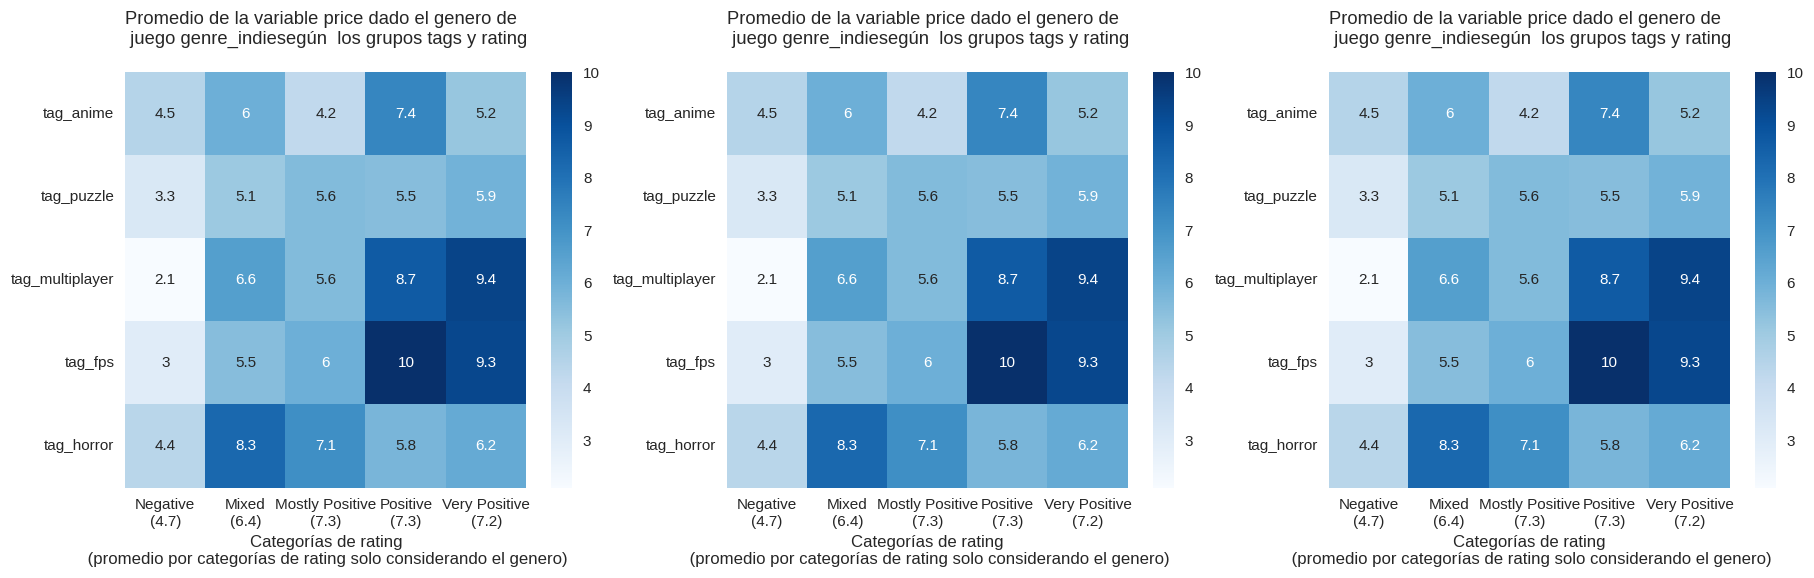

In [ ]:
_, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=110)

for i, g in enumerate(["genre_indie", "genre_action", "genre_adventure"]):
  avg_per_catplot(df_proc, axes[i], num_var="price", genre_cat="genre_indie")

**Comentarios de tags**:

* Las categorías exclusivas en `tags` que no se encuentran en `genre` tienen
un alto grado de _sparse_. Especificamente, una cardinalidad de 280 categorías
exclusivas dentro de `tags`, y de las cuales 262 tiene menos de 100
observaciones.
* Se observan diferencias importantes en
 los promedios de variables númericas cuando se considera el `genre` + 'tags' _versus_ solo considerar el `genre`.
* Lo último puede ser de utilidad para modelos de ensamblaje basados en
 arboles, ya que pueden tratar información local a un nivel bastante fino (poca
 frecuencia de observaciones), y constituir una señal para mejorar la capacidiad discriminatoria del
 clasificador. Algo a tener en consideración en la parte de modelamiento.

- Luego se analiza las variables `relase_month`, `english`, `required_age` y `publisher` .

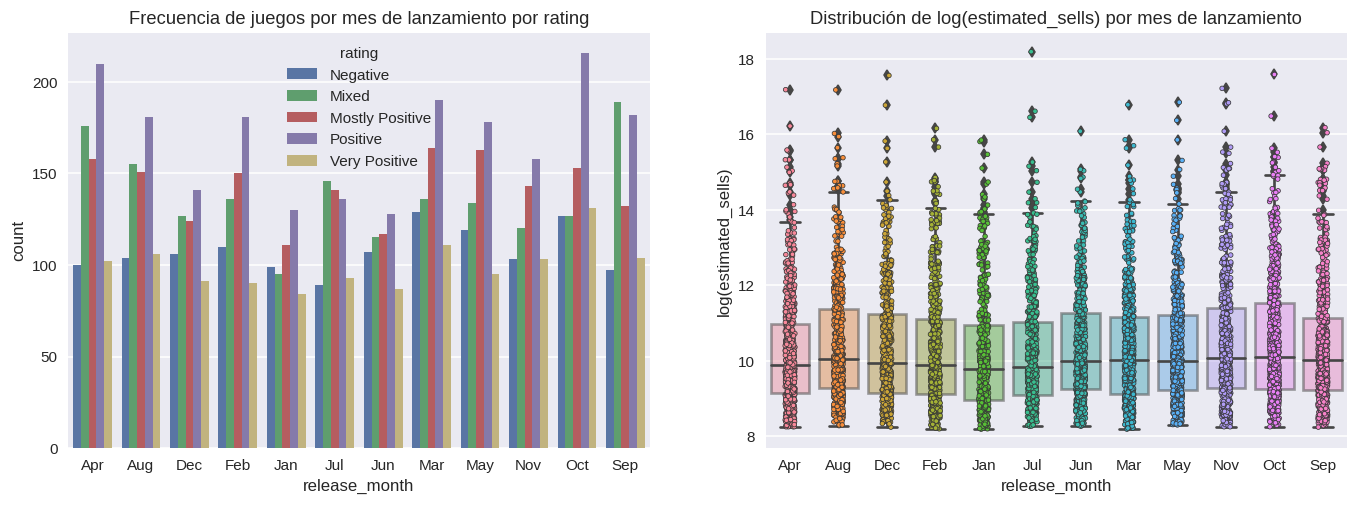

In [ ]:
plt.figure(figsize=(15, 5), dpi=110)
plt.subplot(1, 2, 1)
sns.countplot(x="release_month", hue="rating", data=df_proc);
plt.title("Frecuencia de juegos por mes de lanzamiento por rating");

plt.subplot(1, 2, 2)
sns.boxplot(x=df_proc["release_month"], y=np.log(df_proc["estimated_sells"] + 0.001),
            boxprops={"alpha": 0.5});
sns.stripplot(x=df_proc["release_month"], y=np.log(df_proc["estimated_sells"] + 0.001),
              edgecolor='#373737', linewidth=0.5, size=3);
plt.title("Distribución de log(estimated_sells) por mes de lanzamiento");
plt.ylabel("log(estimated_sells)");

- En términos generales la cantidad de juegos por mes de lanzamiento se encuentra equilibrada.
- Se observa una leve tendencia de mayores valoraciones negativas en los meses de verano (hemisferio norte), y de mayores valoraciones positivas en los meses de invierno.
- No se aprecia gran diferencia en las ventas estimadas dependiendo del mes, por lo que para este vector objetivo este atributo podría no ser de ayuda.

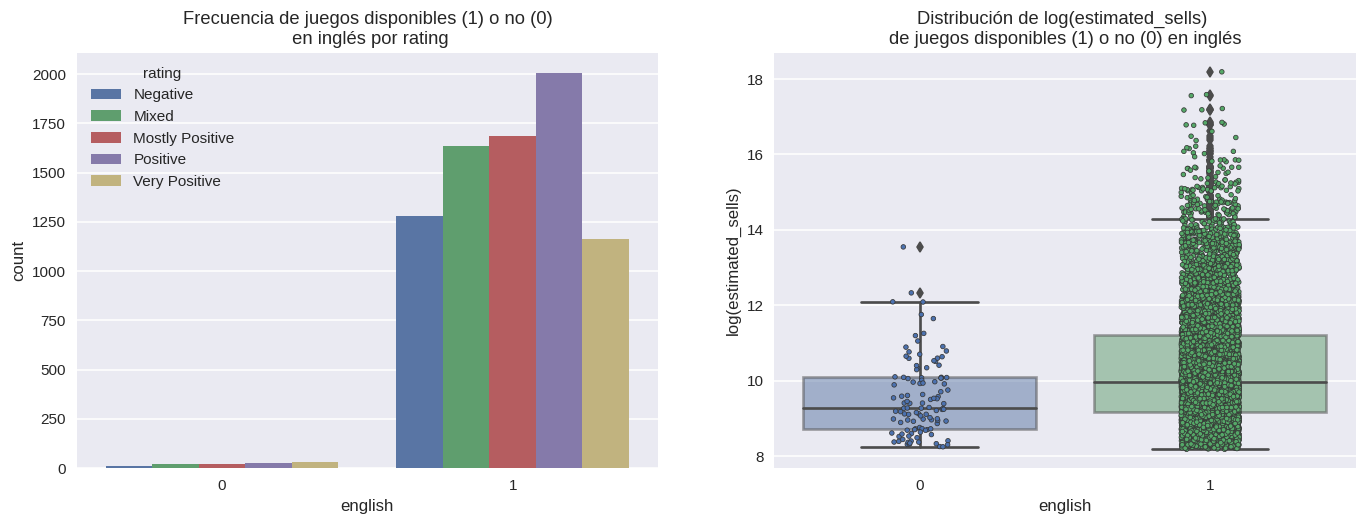

In [ ]:
plt.figure(figsize=(15, 5), dpi=110)
plt.subplot(1, 2, 1)
sns.countplot(x="english", hue="rating", data=df_proc);
plt.title("Frecuencia de juegos disponibles (1) o no (0)\n en inglés por rating");

plt.subplot(1, 2, 2)
sns.boxplot(x=df_proc["english"], y=np.log(df_proc["estimated_sells"] + 0.001),
            boxprops={"alpha": 0.5});
sns.stripplot(x=df_proc["english"], y=np.log(df_proc["estimated_sells"] + 0.001),
              edgecolor='#373737', linewidth=0.5, size=3);
plt.title("Distribución de log(estimated_sells) \nde juegos disponibles (1) o no (0) en inglés");
plt.ylabel("log(estimated_sells)");

**Comentarios de english**
- Para el caso de `rating`, la frecuencia en cada categoría para juegos no disponibles en inglés es muy baja, por lo que para este vector objetivo esta variable podría no ser buen predictor.
- Para el caso de `estimated_sells`, se aprecia una tendencia a mayor número de ventas para juegos disponibles en inglés.

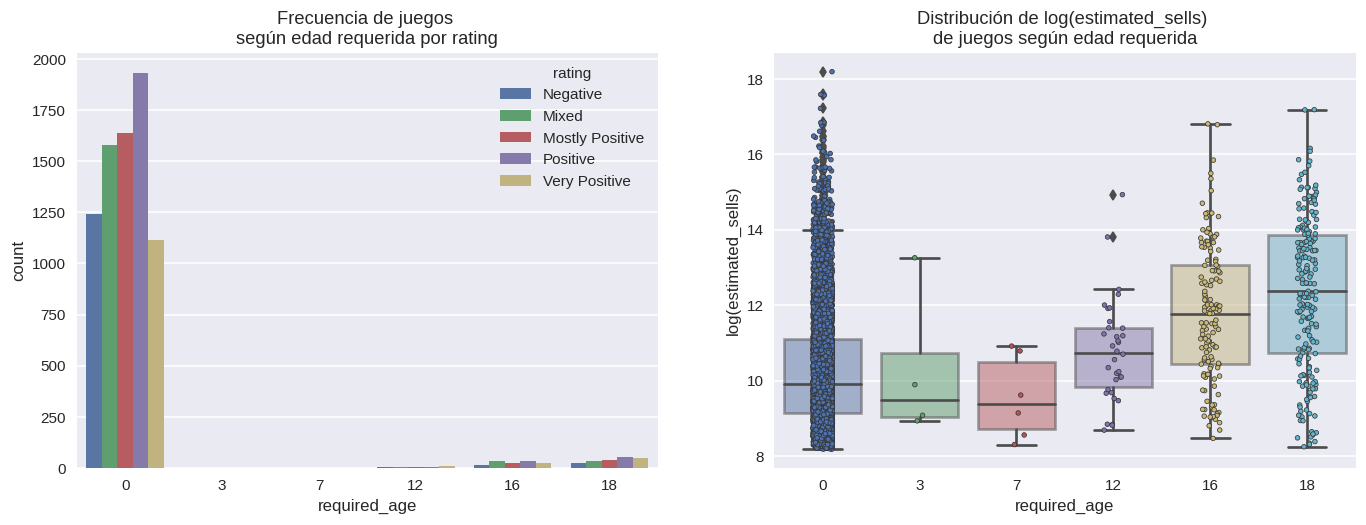

In [ ]:
plt.figure(figsize=(15, 5), dpi=110)
plt.subplot(1, 2, 1)
sns.countplot(x="required_age", hue="rating", data=df_proc);
plt.title("Frecuencia de juegos \nsegún edad requerida por rating");

plt.subplot(1, 2, 2)
sns.boxplot(x=df_proc["required_age"], y=np.log(df_proc["estimated_sells"] + 0.001),
            boxprops={"alpha": 0.5});
sns.stripplot(x=df_proc["required_age"], y=np.log(df_proc["estimated_sells"] + 0.001),
              edgecolor='#373737', linewidth=0.5, size=3);
plt.title("Distribución de log(estimated_sells) \nde juegos según edad requerida");
plt.ylabel("log(estimated_sells)");

**Comentarios de required age**
- La gran mayoría de los juegos no tiene una edad requerida. Se observa una leve mayor frecuencia para 16 y 18.
- En cuanto a `rating`, dada la baja frecuencia para cada clase en los juegos que tienen una edad requerida, `requried_age` podría ser un mal predictor.
- En cuanto a `estimated_sells`, omitiendo las categorías 3 y 7 que tienen muy pocos datos, se observa una leve tendencia al aumento de ventas al aumentar la edad requerida, por lo que podría beneficiar en las predicciones de este vector objetivo.

In [ ]:
print(f"Cantidad de publishers diferentes: {df_proc['publisher'].nunique()}\n")
print("10 Publisher más frecuentes")
vc_pub = df_proc["publisher"].value_counts()
print(vc_pub.head(10))
print(f"\nLos 10 publisher más frecuentes concentran el "
f"{round(vc_pub.head(10).sum() / df_proc.shape[0] * 100, 2)}% de los datos totales.")

Cantidad de publishers diferentes: 3992

10 Publisher más frecuentes
Ubisoft                       94
Square Enix                   81
THQ Nordic                    74
SEGA                          62
Devolver Digital              59
Sekai Project                 54
BANDAI NAMCO Entertainment    48
Paradox Interactive           46
Focus Home Interactive        46
1C Entertainment              46
Name: publisher, dtype: int64

Los 10 publisher más frecuentes concentran el 7.74% de los datos totales.


- Dada la gran cantidad de `publisher` diferentes, se considera los 10 más frecuentes para el análisis exploratorio. Los que tienen un publisher diferente se muestran como `other`. Esto se tomará en cuenta para el pipeline de procesamiento, dado que no es práctico generar una columna binaria para cada publisher diferente.

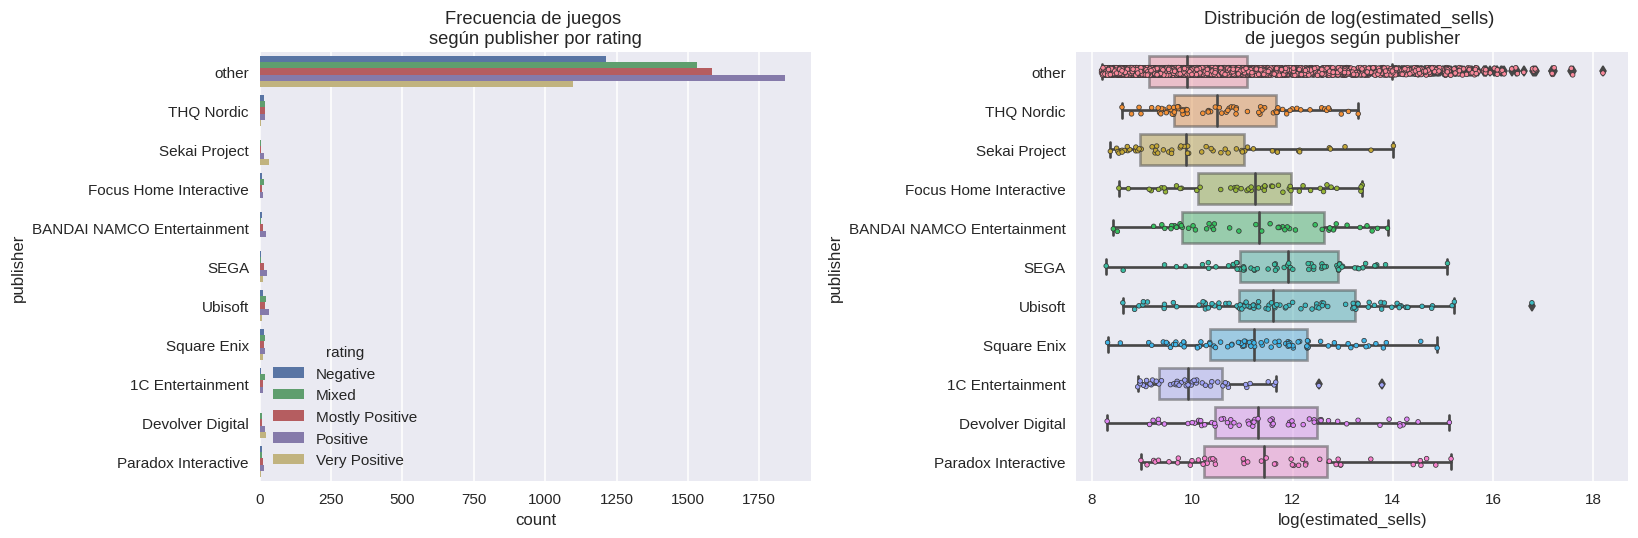

In [ ]:
# Se genera df de publisher para análisis
publisher = df_proc[["publisher", "rating", "estimated_sells"]].copy()
publisher["publisher"] = np.where(
    publisher["publisher"].isin(vc_pub.head(10).index),
    publisher["publisher"],
    "other"
)

plt.figure(figsize=(15, 5), dpi=110)
plt.subplot(1, 2, 1)
sns.countplot(y="publisher", hue="rating", data=publisher, orient="h");
plt.title("Frecuencia de juegos \nsegún publisher por rating");

plt.subplot(1, 2, 2)
sns.boxplot(y=publisher["publisher"],
            x=np.log(publisher["estimated_sells"] + 0.001),
            boxprops={"alpha": 0.5}, orient="h");
sns.stripplot(y=publisher["publisher"],
              x=np.log(publisher["estimated_sells"] + 0.001),
              edgecolor='#373737', linewidth=0.5, size=3, orient="h");
plt.title("Distribución de log(estimated_sells) \nde juegos según publisher");
plt.xlabel("log(estimated_sells)");
plt.tight_layout();

**Comentarios publisher**
- Al igual que en casos anteriores, `publisher` podría no ser buen predictor para `rating`, dado la muy baja frecuencia en cada clase en cada categoría.
- En cuanto a `estimated_sells`, se observa algunas diferencias en la cantidad de ventas dependiendo del `publisher`, por lo que podría ser un aporte.

### 2.6 Análisis columna de texto `short_description`

**Cantidad de palabras diferentes**

Se explora la cantidad de palabras diferentes en todos los documentos, y cuántas tienen una frecuencia relevante. Esto con el fin de posteriormente asignar un número adecuado de `max_features` en el _pipeline_ de entrenamiento.

- Para ello se define primero la función de procesamiento de texto. En ella removemos caracteres extraños y números, además de llevar a minúscula, y aplicar _lemmatización_; Consideramos que este procesamiento es mejor en comparación a _stem_, ya que considera el origen léxico de la palabra, en lugar de tomar solo sus primeras letras, lo que en algunos casos en inglés puede producir raíces sin significado común. Ej: "carpet" y "car" tienen el mismo _stem_ "car", pero las palabras originales no hacen referencia al mismo objeto.

In [ ]:
def text_preprocessor(text):
  lmtz = WordNetLemmatizer()
  text = text.lower()
  text = re.sub('\[.*?¿\]\%', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\w*\d\w*', '', text)
  text = re.sub('[‘’“”…«»]', '', text)
  text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text)
  text = re.sub('\n', ' ', text)
  
  def get_lemma(lmtz, word):
      tag_parts = pos_tag(word_tokenize(word))
      tag_letter = tag_parts[0][1][0].lower() # sacar la primera letra del tag
      tag_letter = tag_letter if tag_letter in ["a", "r", "n", "v"] else None
      return word if not tag_letter else lmtz.lemmatize(word, tag_letter)

  text = ' '.join([get_lemma(lmtz, word) for word in text.split()])
  return text

- Se obtiene palabras y frecuencias

In [ ]:
count_vectorizer=CountVectorizer(
    stop_words=stopwords.words("english") + ["far", "make"],
    preprocessor=text_preprocessor
)
count_vectorizer_fit = count_vectorizer.fit_transform(df_proc["short_description"])
words = count_vectorizer.get_feature_names_out()
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
words_freq_df = pd.DataFrame([words, words_freq]).T.sort_values(by=[1], ascending=False)
words_freq_df.columns = ["Palabra", "Frecuencia"]
words_freq_df.T

5452   15241 9187    10228 10223      196   13440   125   10804  \
Palabra     game  world   new  player  play  adventure  take  action  quot   
Frecuencia  3771   2033  1169     987   984        941   913     904   781   

           13781  ...  7285   7287    7288       7290  7291  7293   \
Palabra     time  ...  jumpb  jumpg  jumpin  jumpscare   jun  jung   
Frecuencia   748  ...      1      1       1          1     1     1   

                   7294    7299      7300    15848  
Palabra     jungheinrich  junker  junkyard  黄昏下的教室  
Frecuencia             1       1         1       1  

[2 rows x 15849 columns]

In [ ]:
words_freq_df["Frecuencia"].astype(int).describe()

count    15849.000000
mean        10.819799
std         53.229818
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       3771.000000
Name: Frecuencia, dtype: float64

In [ ]:
(words_freq_df.head(1000)["Frecuencia"].min(),
 words_freq_df.head(500)["Frecuencia"].min(),
 words_freq_df.head(250)["Frecuencia"].min())

(32, 69, 121)

**Comentarios palabras más frecuentes**
- Se observa un total de 15.859 palabras diferentes (post procesamiento y aplicación de lemmatización).
- El 75% de estas palabras tiene una frecuencia de 5 o inferior.
- Al considerar las 1.000, 500 y 250 palabras más frecuentes, la frecuencia de ocurrencia de la palabra con menor ocurrencia en cada caso es de 32, 69 y 121 respectivamente. Frente a esto, _se decide utilizar 500 palabras más frecuentes_ posteriormente en el pipeline de procesamiento.

**Palabras más frecuentes por rating**

A continuación se genera una función para obtener las bolsas de palabras más frecuentes para cada rating. Esta función y estos datos solo se utilizarán para el análisis exploratorio.

In [ ]:
def get_words_freq_by_col_category(data, filter_value,
                                   text_col="short_description",
                                   filter_col="rating", max_features=20,
                                   stop_words="english"):
  
    count_vectorizer=CountVectorizer(
        stop_words=stop_words,
        max_features=max_features,
        preprocessor=text_preprocessor
    )
    count_vectorizer_fit = count_vectorizer.fit_transform(data[data[filter_col]==filter_value][text_col])
    words = count_vectorizer.get_feature_names_out()
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    words_freq_df = pd.DataFrame([words, words_freq]).T.sort_values(by=[1], ascending=False)
    words_freq_df.columns = ["Palabra", "Frecuencia"]
    return words_freq_df

In [ ]:
# Se obtiene 20 palabras más frecuentes para cada rating
custom_sw = stopwords.words("english") + ["far", "make"]

words_freqs = {
    r: get_words_freq_by_col_category(df_proc, r, stop_words=custom_sw)
    for r in df_proc["rating"].unique()
}

- Se explora palabras más frecuentes en las descripciones para cada `rating`.

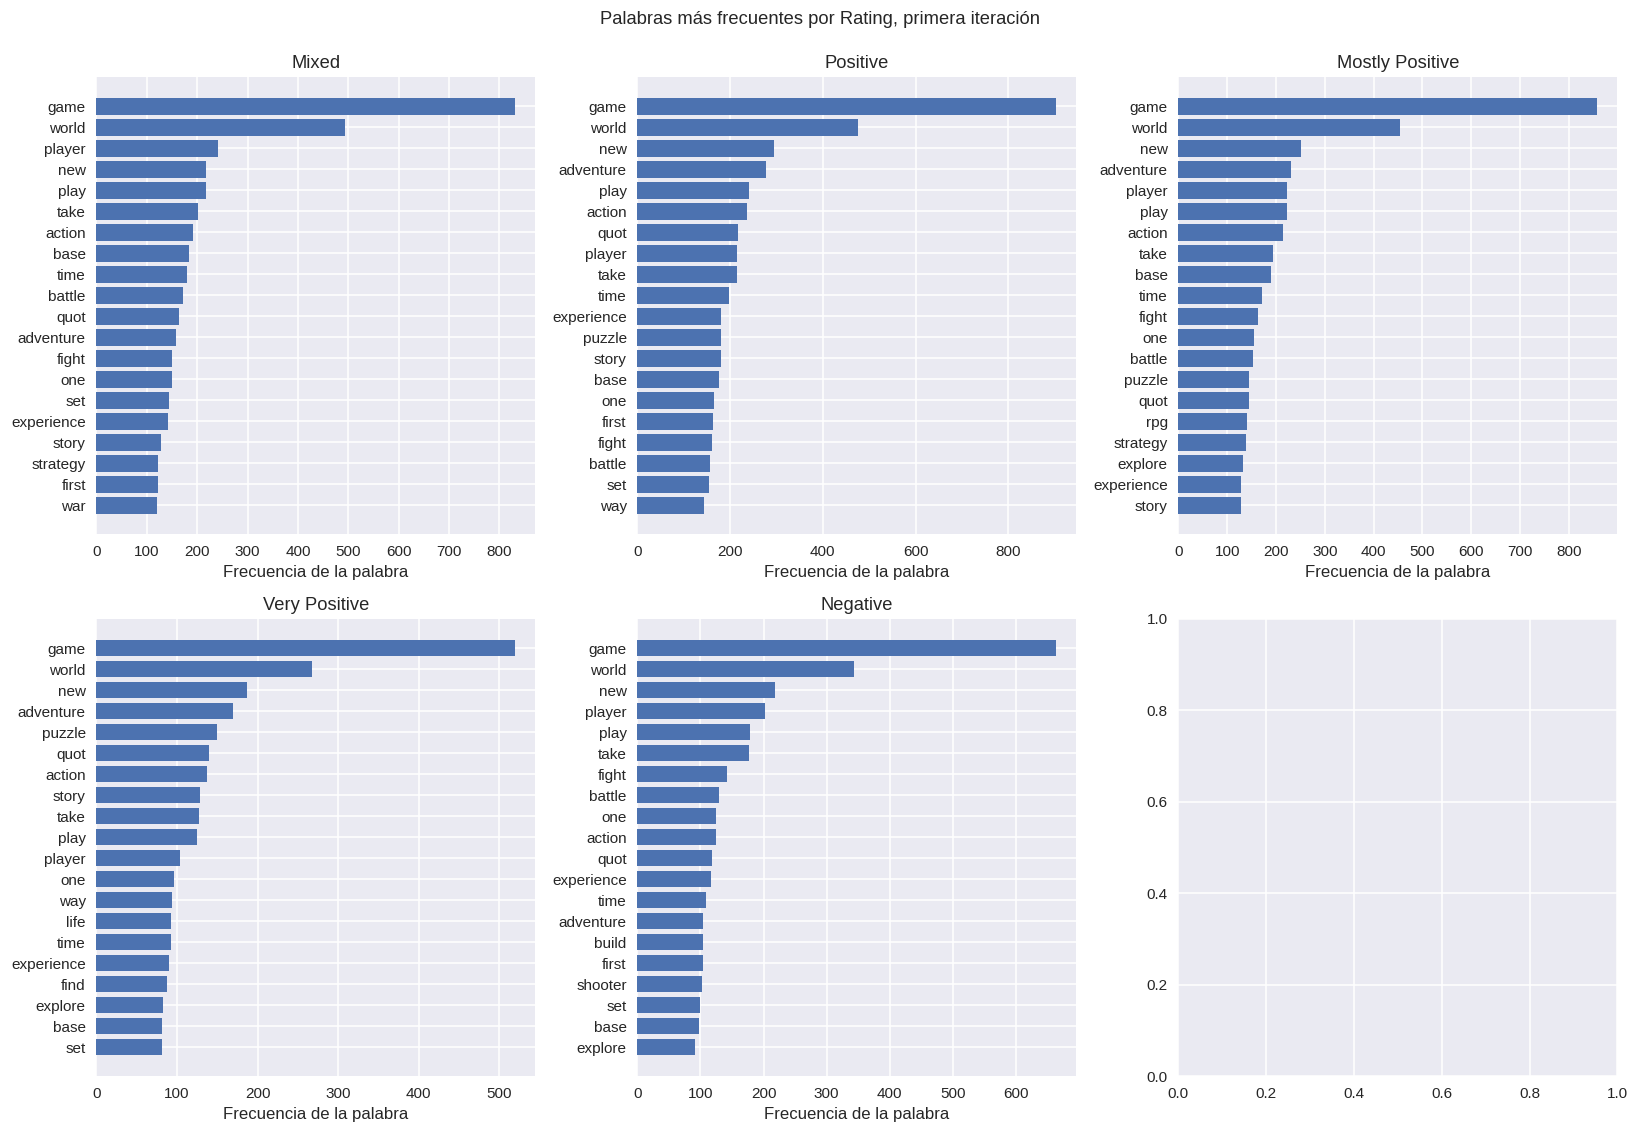

In [ ]:
_, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=110)
axes = axes.flatten()
plt.suptitle("Palabras más frecuentes por Rating, primera iteración", y=1.025)

for i, (k, v) in enumerate(words_freqs.items()):
  v = v.sort_values(by=["Frecuencia"])
  axes[i].barh(v["Palabra"], v["Frecuencia"])
  axes[i].set_title(k)
  axes[i].set_xlabel("Frecuencia de la palabra");

plt.tight_layout()

- Se observa que dentro de las palabras frecuentes hay muchas que se repiten para los distintos `rating`, por lo que no serían útiles para discriminar entre estas clases. Por ello, se genera una nueva vectorización eliminando estas palabras, para explorar qué palabras sí permitirían discriminar entre un rating y otro. Luego en el pipeline de entrenamiento se eliminarán también estas palabras más frecuentes presentes en todos los rating.

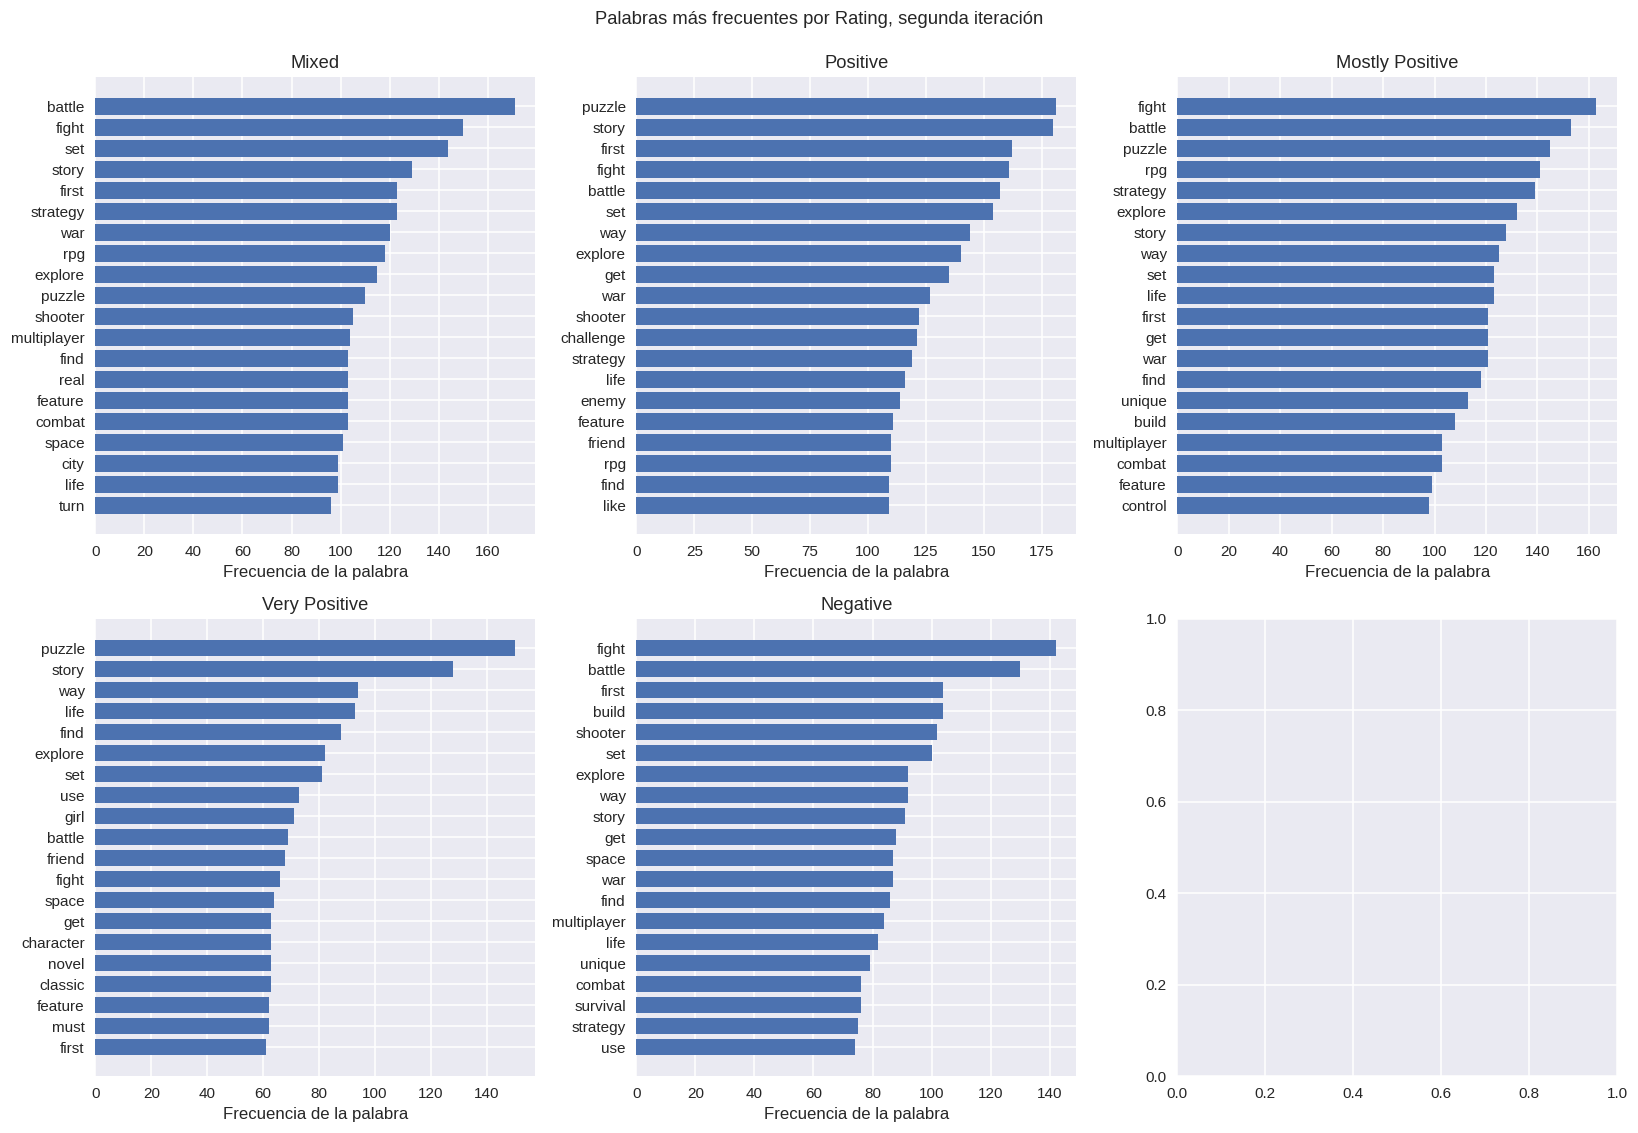

In [ ]:
new_sw = custom_sw + [
    "game", "world", "player", "new", "play", "take", "action", "base",
    "time", "quot", "adventure", "one", "experience"
]

words_freqs_dep = {
    r: get_words_freq_by_col_category(df_proc, r, stop_words=new_sw)
    for r in df_proc["rating"].unique()
}

_, axes = plt.subplots(2, 3, figsize=(15, 10), dpi=110)
axes = axes.flatten()
plt.suptitle("Palabras más frecuentes por Rating, segunda iteración", y=1.025)

for i, (k, v) in enumerate(words_freqs_dep.items()):
  v = v.sort_values(by=["Frecuencia"])
  axes[i].barh(v["Palabra"], v["Frecuencia"])
  axes[i].set_title(k)
  axes[i].set_xlabel("Frecuencia de la palabra");

plt.tight_layout()

- En términos generales, tienen mejor calificación los juegos descritos como puzzle / story, y menor calificación los de pelea / batalla.

### 2.7 Proyecciones en baja dimensionalidad

Antes de aplicar la proyección, _se genera una nueva función de procesamiento de datos_, para aplicar las transformaciones necesarias a realizar posterior al análisis exploratorio:
- Se creará 10 columnas para los publisher más frecuentes.
- Se aplicará transformación de `box_cox` a los atributos continuos para disminuir efecto de valores atípicos.

La función anterior luego será incluida en el _pipeline_ de entrenamiento del modelo. En forma separada, se aplicará la estandarización de datos mediante `MinMaxScaler` para los atributos continuos. El escalamiento no se incluye dentro de la función de procesamiento, ya que durante el entrenamiento se realiza un paso en el _pipeline_ que aplica esta transformación.

No se incluye en esta proyección el _bag of words_ de `description` debido a la gran dispersión de la matriz generada.

Para este análisis no se binarizará required age, aprovechando que las categorías son jerárquicas. Posteriormente en el modelamiento sí se le aplicará codificación `OneHot`.

Para la proyección escogimos el método UMAP, ya que de los que conocemos es el único que al parecer permite trabajar con datos binarios y continuos; PCA y T-SNE se aplican sobre variables continuas. Esto considerando que la gran mayoría de columnas generadas en el _set_ de datos son continuas.

A modo de comparación, se realiza también una proyección 2-D utilizando T-SNE, considerando solo los atributos continuos.

**Procesamiento post análisis exploratorio**

In [ ]:
def proc_data_post(data):
  df_proc = data.copy()

  publisher_frec = ['ubisoft', 'square enix', 'thq nordic', 'sega',
                    'devolver digital', 'sekai project',
                    'bandai namco entertainment', 'paradox interactive',
                    'focus home interactive', '1c entertainment']
  
  publisher_cols = [
      f"publisher_{c}"
      for c in pd.Series(publisher_frec).replace(
          [r" "], ["_"], regex=True
      )
  ]

  for i in range(len(publisher_frec)):
    df_proc[publisher_cols[i]] = np.where(
        df_proc["publisher"].str.lower().str.contains(publisher_frec[i]),
        1, 0
    )

  df_proc["publisher_other"] = np.where(
      df_proc[publisher_cols].sum(axis=1) > 0, 0, 1
  )

  for c in ["price", "achievements", "average_playtime"]:
    fitted_data, _ = stats.boxcox(df_proc[c] + 0.001)
    df_proc[c] = fitted_data

  return df_proc.drop(columns=["publisher"])

In [ ]:
post_proc_data = proc_data_post(df_proc).drop(columns=["short_description", "estimated_sells", "rating"])

umap_data = pd.get_dummies(pd.concat([
    pd.DataFrame(
        MinMaxScaler().fit_transform(
            post_proc_data[["price", "achievements", "average_playtime"]]
        ),
        columns=["price", "achievements", "average_playtime"]
    ),
    post_proc_data.drop(columns=["price", "achievements", "average_playtime"])
], axis=1))

**UMAP**

In [ ]:
proyector = umap.UMAP(random_state=88, n_neighbors=20, min_dist=0.15)
umap_3d = umap.UMAP(n_components=3, n_neighbors=20, min_dist=0.15, random_state=88)

projections = proyector.fit_transform(umap_data)
proj_3d = umap_3d.fit_transform(umap_data)

fig_df = pd.concat(
    [
        df_train[["name", "rating", "estimated_sells"]],
        umap_data,
        pd.DataFrame(projections, columns=["x", "y"]),
    ],
    axis=1,
)

fig_3d = pd.concat(
    [
        df_train[["name", "rating", "estimated_sells"]],
        umap_data,
        pd.DataFrame(proj_3d, columns=["x", "y", "z"]),
    ],
    axis=1,
)

In [ ]:
px.scatter(
    fig_df,
    x="x",
    y="y",
    color="rating",
    hover_name=fig_df["name"],
    labels={"rating": "Rating"},
    hover_data=[
        "estimated_sells"
    ],
    range_x=(fig_df["x"].min() - 1, fig_df["x"].max() + 1),
    range_y=(fig_df["y"].min() - 1, fig_df["y"].max() + 1),
)

In [ ]:
fig_3d = px.scatter_3d(
    fig_3d, x="x", y="y", z="z",
    color="rating"
)
fig_3d.update_traces(marker_size=5)
fig_3d.show()

**Comentarios UMAP**
- La proyección generada no permite distinguir grupos importantes de datos. Los grupos generados no se condicen con una categoría de rating específico, ni con tramos de ventas estimadas específicos (al pasar el mouse se ven valores de ventas muy distintos en los grupos creados).
- En la figura 2D, solo se observa una tendencia en el cluster de valores `x` altos y valores `y` bajos. Bajo mismos valores de `y`, los juegos con valores más altos en la proyección `x` tienen más valoraciones positivas, y los juegos con valores más bajos en la proyección `x` tienen valoración negativa.
- A pesar de lo anterior, en la proyección 3D no se logra apreciar "clusters" de clases.

**TSNE Atributos continuos**

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
features_tsne_embedded = tsne.fit_transform(umap_data[["price", "achievements",
                                                       "average_playtime"]])

fig_df["x_tsne"] = features_tsne_embedded[:, 0]
fig_df["y_tsne"] = features_tsne_embedded[:, 1]
px.scatter(fig_df, x="x_tsne", y="y_tsne", color="rating", hover_data=[
        "estimated_sells"
    ])

**Comentarios TSNE**

- A diferencia del caso anterior, en este caso sí se presentan distintas zonas de agrupación.
- Se ve una tendencia de juegos Very Positive al tener valores altos de las proyecciones `x` e `y`, mientras que juegos negativos se presentan con valores más bajos de estas proyecciones. En este sentido, sí se ve una cierta polaridad al hacer la proyección.
- En cuanto a las ventas no se observa una tendencia clara, lo que de todas formas es difícil de apreciar al ser un valor continuo y poder explorar a la vez solo 1 valor al pasar el mouse.

---

## 3. Preparación de Datos

Esta sección consiste en generar los distintos pasos para preparar sus datos con el fin de luego poder crear su modelo.

### 3.1 Imputaciones

La primera parte del _pipeline_ es crear dos pasos para imputar: uno para
columnas númericas y otro para categóricas. En ambos casos
se utiliza `SimpleImputer`, en el primero con `strategy="mean"` y
el segundo con `strategy="most_frequent"`.

**¿Porqué se aplica primero la imputación?** Es la única forma de garantizar que valores nulos en las columnas con categorías colapsadas como `genre` puedan ser imputadas previo a su preprocesamiento. De manera contraria, se debería delegar la imputación dentro de la función de preprocesamiento (`data_proc()`), contaminando cambio de estructura del input bruto con una decisión de imputación. No realizar esta verificación, implicaría que la función de preprocesamiento arroje error, o que se omita arbitrariamente información de una observación solo porque le falta un dato en las columnas a procesar.


In [ ]:
cat_imputer = Pipeline(
    steps=[
        ("imputer-categorical", SimpleImputer(strategy="most_frequent"))
    ]
)

num_imputer = Pipeline(
    steps=[
        ("imputer-numerical", KNNImputer(n_neighbors=3, missing_values=np.nan))
    ]
)

### 3.2 Transformaciones atributos numéricos y categóricos

En la sección 2.3 se realizaron una serie de transformaciones para preprocesar
los datos en la función `data_proc`. Estas transformaciones son para adaptar
a un mínimo manejable la estructura de los datos, y algunas variables categóricas se llevan a representación _one hot encoding_ dentro de la
función, dado que es la única forma de compactar la información de algunas
colunnas para conservar un vector característico por observación.

Así mismo, se concatena una segunda función de procesamiento `proc_data_post`, la cual fue definida luego de realizar el análisis exploratorio en la sección 2.7. Esta función _aplica también la transformación de atributos continuos_ para reducir su sesgo / efecto de outliers.

 Todo esto se aplicará en el _pipeline_
directamente usando las funciones `data_proc` y `proc_data_post` en conjunto con `FunctionTransformer`, el código
es el siguiente:

```python
    # Pre-procesamiento general (utilizado en sección 2.3)
    ("preprocess", FunctionTransformer(data_proc)),
    # Post-procesamiento general (utilizado en sección 2.7)
    ("postprocess", FunctionTransformer(proc_data_post)),
```


### 3.3 Estandarización de datos numéricos y procesamiento categóricos restantes

Luego, definimos dentro de un `ColumnTransformer` transformaciones que se
aplicaran según las columnas sean númericas (`num_cols`) o columnas categóricas (`cat_cols`). En concreto, para las númericas se escalaran los valores usando
`MinMaxScaler`, y para las categóricas se transformará su representación a
_one hot encoding_.

In [ ]:
## Código
num_pipe = Pipeline(
    # Tratamiento para variables númericas
    steps=[
       ("scaler", MinMaxScaler()) 
    ]
)

cat_onehot = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ]
)

Es importante destacar que las funcienes `data_proc` y `proc_data_post` ya transforma algunas de las
variables categóricas a una representación _one hot encoding_. 

Agregaremos un paso de "utilidad" que nos permita saltarnos una transformación,
o dicho de otro modo, realizar la transformación identidad en un grupo de
columnas. Crearemos la clase utilitaria `NoTransformer()` que devuelve la selección de columnas entregadas en el ColumnTransformer:

In [ ]:
class NoTransformer(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    assert isinstance(X, pd.DataFrame)
    return X

### 3.4 Procesamiento de texto

Tenemos que crear un paso para darle un tratamiento especial a la columna
de texto `short_description`. Las transformaciones requeridas son para 
tokenizar y crear un _bag-of-words_ a partir de los token que conforman cada
texto. Se requiere además estandarizar los largos de estos vectores, para que
la matriz de característica conserve igual número de columnas.

In [ ]:
# Se define puntuaciones custom
custom_punct = punctuation + '’–‘“”'

# Se (vuelve) a definir las stopwords utilizadas, solo para saltarse el 
# ejecutar la sección 2.6 con el análisis de palabras frecuentes, y experimentar
# más rápido
custom_sw = stopwords.words("english") + ["far", "make"]
new_sw = custom_sw + [
    "game", "world", "player", "new", "play", "take", "action", "base",
    "time", "quot", "adventure", "one", "experience"
]

In [ ]:
# Definimos un tokenizador con Lemma
class LemmaTokenizer:
    def __init__(self, stop_words, punctuation, word_tokenize, pos_tag,
                 lmtz = WordNetLemmatizer()):
        self.stop_words = stop_words
        self.punctuation = punctuation
        self.word_tokenize = word_tokenize
        self.pos_tag = pos_tag
        self.lmtz = lmtz
        
    def __call__(self, doc):
        doc_tok = [self.get_lemma(word).lower() for word in word_tokenize(doc)]
        # remover stopwords, puntuaciones
        doc_tok = [
            t
            for t in doc_tok
            if (t not in self.stop_words) and (t not in self.punctuation)
        ]
        return doc_tok

    def get_lemma(self, word):
      tag_parts = self.pos_tag([word])
      tag_letter = tag_parts[0][1][0].lower() # sacar la primera letra del tag
      tag_letter = tag_letter if tag_letter in ["a", "r", "n", "v"] else None
      return word if not tag_letter else self.lmtz.lemmatize(word, tag_letter)

tokenizador = LemmaTokenizer(new_sw, custom_punct, word_tokenize, pos_tag)

# Algunas descripciones del dataset a modo de ejemplo 
docs = df_train["short_description"][:1]

# Obtenemos el token del primer documento
print(f'Descripcción sin tokenizar: {df_train["short_description"][:1]}')
[tokenizador(doc) for doc in docs]

Descripcción sin tokenizar: 0    One day your roommate Leaves for no reason. Yo...
Name: short_description, dtype: object


[['day',
  'roommate',
  'leaves',
  'reason',
  'left',
  'face',
  'outside',
  'alone',
  'difficult',
  'amaze',
  'autism',
  'recreates',
  'people',
  'autism',
  'perceive',
  'form',
  'sound',
  'graphic',
  'interaction',
  'intentional']]

In [ ]:
def toarray(x): return x.toarray()

bag_of_words = Pipeline(
    steps=[
        ("tokenizer", CountVectorizer(
            tokenizer = LemmaTokenizer(new_sw, custom_punct, word_tokenize,
                                       pos_tag),
            ngram_range=(1,2),
            max_features=500,
            token_pattern=None
        )),
        ('tfid', TfidfTransformer(norm="l2", sublinear_tf=False)),
        ("toarray", FunctionTransformer(toarray, accept_sparse=True))
    ]
)

In [ ]:
bag_of_words.fit_transform(df_train["short_description"]).shape

(7881, 500)

### 3.5 Creación de Pipeline

Congregáremos todos los pasos anteriores en un solo _pipeline_, además de especificar las variables en listas, y así controlar cuáles de las
transformaciones anteriores se aplica a cada una de las columnas.

In [ ]:
# Columnas originales para imputar previo a preprocesamiento
original_cat_to_impute = ['release_date', 'english', 'developer', 'name',
                           'publisher','platforms','required_age','categories',
                           'genres','tags', 'short_description']

# columnas a procesar como númericas para escalar...
num_cols = ["price", "average_playtime", "achievements"] 

# Columnas creadas luego del preprocesamiento data_proc para incorporar luego
# de tratamiento por columnas (Seleccion - Función Identidad)
cat_cols = ['platform_mac',
            'platform_linux','genre_indie','genre_action',
            'genre_adventure','genre_casual','genre_strategy',
            'genre_rpg','genre_simulation','genre_free_to_play',
            'genre_early_access','genre_massively_multiplayer',
            'genre_other','developer_feral_interactive_mac',
            'developer_koei_tecmo_games_co_ltd',
            'developer_square_enix','developer_valve',
            'developer_ubisoft_montreal','developer_other',
            'category_singleplayer','category_steam_achievements',
            'category_steam_trading_cards','category_steam_cloud',
            'category_full_controller_support','category_multiplayer',
            'category_partial_controller_support','category_steam_leaderboards',
            'category_online_multiplayer','category_coop','category_other',
            'tag_anime', 'tag_puzzle', 'tag_multiplayer', 'tag_fps', 'tag_horror',
            'publisher_square_enix', 'publisher_thq_nordic', 'publisher_sega',
            'publisher_devolver_digital', 'publisher_sekai_project',
            'publisher_bandai_namco_entertainment', 'publisher_paradox_interactive',
            'publisher_focus_home_interactive', 'publisher_1c_entertainment',
            'publisher_other']

# Columnas a utilizar onehot directamente (posteripr a data_proc)
cat2onehot_cols = ["english", "required_age", "release_month"]            

# Columna a tokenizar
tokenize_col = "short_description"


# --- Crear pipeline de preprocesamiento completo

preprocess = Pipeline([
    # Imputar variables previo a transformarlas en one-hot dentro del data_proc
    ("impute_variables", ColumnTransformer(transformers=[
          ("numerical", num_imputer, num_cols),
          ("categorical", cat_imputer, original_cat_to_impute),
        ]).set_output(transform="pandas")
    ),

    # Pre-procesamiento general (utilizado en sección 2.3)
    ("preprocess", FunctionTransformer(data_proc)),
    # Post-procesamiento general (utilizado en sección 2.7)
    ("postprocess", FunctionTransformer(proc_data_post)),

    # Pre-procesamiento para columnas númericas y selección de categoricas
    ("column_transform", ColumnTransformer(transformers=[
        ("numerical", num_pipe, num_cols),
        # Seleccionar variables categoricas creadas de data_proc (ya estan one-hot)
        ("categorical-identity", NoTransformer(), cat_cols),
        # Aplicar one-hot a variables categoricas no modificadas a one-hot en data_proc 
        ("categorical-onehot", cat_onehot, cat2onehot_cols),
        # Crear tokenizadores
        ("word-tokens", bag_of_words, tokenize_col),
    ]))
])

# --- Visualizar todos los pasos en un diagrama
set_config(display="diagram")
preprocess

Pipeline(steps=[('impute_variables',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer-numerical',
                                                                   KNNImputer(n_neighbors=3))]),
                                                  ['price', 'average_playtime',
                                                   'achievements']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer-categorical',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['release_date', 'english',
                                                   'developer', 'name',
                                                   'publisher', 'pla...
                                                  ['english', 'required_age',
                                                   'release_month']),
                                                 ('word-tokens',
                                                  Pipeline(steps=[('tokenizer',
                                                                   CountVectorizer(max_features=500,
                                                                                   ngram_range=(1,
                                                                                                2),
                                                                                   token_pattern=None,
                                                                                   tokenizer=<__main__.LemmaTokenizer object at 0x7f1fc06627f0>)),
                                                                  ('tfid',
                                                                   TfidfTransformer()),
                                                                  ('toarray',
                                                                   FunctionTransformer(accept_sparse=True,
                                                                                       func=<function toarray at 0x7f204de09dc0>))]),
                                                  'short_description')]))])

A continuación se describe a modo de resumen cada paso del _pipeline_ de procesamiento
creado, además de la lógica y justificaciones utilizadas:

1. **Imputar variables categóricas y númericas**. 
  * ¿Porqué se aplica primero la imputación? Es
la única forma de garantizar que valores nulos en las columnas con categorías 
colapsadas como `genre` puedan ser imputadas previo a su preprocesamiento. De
manera contraria, se debería delegar la imputación dentro de la función
de preprocesamiento, contaminando cambio de estructura del _input_ bruto con
una decisión de imputación. No realizar esta verificación, implicaría que la
función de preprocesamiento arroje error, o que se omita arbitrariamente
información de una observación solo porque le falta un dato en las columnas
a procesar.
  * Las variables númericas se imputan utilizando `KNNImputer(n_neighbors=3)` y las categóricas
  `SimpleImputer(strategy="most_frequent")`.
  * Se utilizo el nuevo feature [`Transform.set_output(transform="pandas")`](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html) de la última version de `sklearn` para que  `ColumnTransformer` retorne un pd.DataFrame, y en el siguiente paso la función `data_proc()` reciba
el input en el formato requerido.
2. **Aplicar función de preprocesamiento (aka `data_proc`) para darle estructura a variables categóricas con encoding erratico** como `genre`, `tags`, `platforms`, entre otras.
3. **Aplicar función de post procesamiento (aka `data_proc_post`) para aplicar transformaciones finales a datos, a partir de información obtenida de análisis exploratorio**: (i) Procesamiento variable `publisher`, (ii) transformaciones para reducir sesgo / outliers de variables continuas, como `boxcox`.
4. **Aplicar la siguiente transformación a las columnas númericas `num_cols`:** escalar sus valores usando `MinMaxScaler`.
5. **Aplicar las siguientes transformaciones a las columnas categóricas:** (i) cambiar a _one hot encoding_ las columnas categóricas `cat2onehot_cols` y (ii) aplicar identidad
(selección de variables) a las columnas que fueron transformadas previamente
`cat_cols` a _one hot encoding_ en el paso 2 del _pipeline_.
6. **Crear _bag of words_ en base a la variable `short_description`**.

**Nota**: el paso de selección de variables se agrega en los _pipeline_ junto 
los modelos.

### 3.6 Prueba del pipeline


Ahora, verificquemos nuestro _pipeline_ de preprocesamiento:

In [ ]:
pipe_test = preprocess.fit_transform(df_train)
print(f"Dimensiones de nuestra feature matrix luego de preprocesar: {pipe_test.shape}")

Dimensiones de nuestra feature matrix luego de preprocesar: (7881, 568)


In [ ]:
assert pipe_test.shape[1] == sum([
    500,                           # Cantidad de palabras del tokenizador de texto
    len(cat_cols),                 # Columnas binarizadas en funciones de procesamiento
    len(num_cols),                 # Columnas numéricas (se mantienen)
    sum([                          # Cantidades de columnas one hot restantes
        df_proc[c].nunique()
        for c in cat2onehot_cols
    ])
])

---

## 4. Baseline

### 4.1 Transformaciones a los vectores objetivo `rating` y `estimated_sells`

**Vector objetivo `rating` del problema de clasificación**.

Debemos transformar las etiquetas de las categorías del vector target (`rating`) a
números.

In [ ]:
target_encoder = LabelEncoder()
target_rating = target_encoder.fit_transform(df_train["rating"])
target_rating

array([0, 0, 3, ..., 1, 1, 4])

El _mapping_ de número a etiquetas se puede obtener de
la siguiente forma:

In [ ]:
target_encoder.classes_

array(['Mixed', 'Mostly Positive', 'Negative', 'Positive',
       'Very Positive'], dtype=object)

**Vector objetivo `estimated_sells` del problema de regresión.**

Se aplicará la transformación [`QuantileTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) a la 
variable `estimated_sells` para que siga una distribución normal.

Es conveniente agregar esta transformación sobre el _pipeline_ de regresión
a través [`TransformedTargetRegressor`](https://scikit-learn.org/stable/modules/compose.html#transforming-target-in-regression). Este _wrapper_ nos permite controlar el mapping del _target_ a su transformación, el cual será utilizado durante
el ajuste de los parámetros, pero también se encarga del _mapping_ inverso
para obtener los resultados en el dominio inicial del problema. Se puede
utilizar de la siguiente forma:

```python
pipeline_reg = ...
# Transformación que se aplicara al target y luego de ejecutar el 
# regr.fit(X, y) 
transformer = QuantileTransformer(output_distribution="normal") 
regr = TransformedTargetRegressor(regressor=pipeline_reg,
                                  transformer=transformer)
```
                              

En esta sección, solo aplicaremos inicializaremos la transformación, luego en 
la creación del _pipeline baseline_ para regresión, se incorporará el _wrapper_
para que sea efectivamente aplicada.

In [ ]:
transformer = QuantileTransformer(output_distribution='normal')

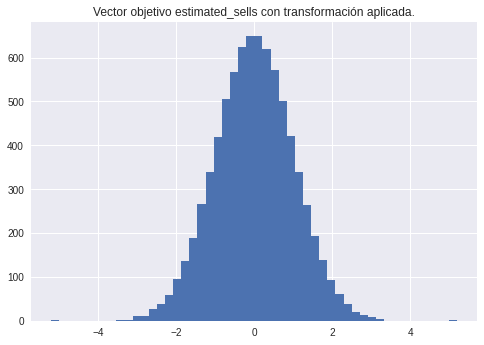

In [ ]:
plt.hist(transformer.fit_transform(df_train[["estimated_sells"]]), bins=50);
plt.title("Vector objetivo estimated_sells con transformación aplicada.");

### 4.2 Generación de subsets

Ahora estamos listos para crear los subconjuntos de 
entrenamiento y test. El primero será utilizado
para ajustar nuestros modelos y experimentar diferentes
configuraciones de hiperparámetros.

**NOTA:** El conjunto de entrenamiento se alterna entre datos de entrenamiento y validación utilizando `StratifiedKFold`. Se reserva por tanto una fracción pequeña de datos (aprox. 100), para test. Esto para probar internamente en una prueba pequeña el desempeño de los modelos y su capacidad de generalización, antes de enviarlos a competencia.

In [ ]:
col_without_target = [col for col in df_train if col != "rating"]
X_train, X_test, y_train, y_test = train_test_split(df_train[col_without_target], 
                                                  target_rating,
                                                  random_state=SEED,
                                                  test_size=0.015,
                                                  stratify=target_rating)

print(f"Dim. conjunto entrenamiento: {X_train.shape}\nDim. conjunto test: {X_test.shape}")

Dim. conjunto entrenamiento: (7762, 15)
Dim. conjunto test: (119, 15)


Creamos también el vector objetivo para el problema de regresión utilizando
los mismos indices de la partición anterior, así los datos son congruentes, y
sus matrices de características no solo son iguales, sino que también se encuentra correctamente mapeados a los vectores objetivos correspondientes.

In [ ]:
y_train_reg = df_train.iloc[X_train.index]["estimated_sells"]
y_test_reg = df_train.iloc[X_test.index]["estimated_sells"]

print(f"Dim. conjunto entrenamiento: {y_train_reg.shape}\nDim. conjunto test: {y_test_reg.shape}")

Dim. conjunto entrenamiento: (7762,)
Dim. conjunto test: (119,)


Verificamos que ambos vector objetivos se encuentren vinculados a la misma
observación:

In [ ]:
df_train.iloc[0, :][["rating", "estimated_sells"]]

rating             Mixed
estimated_sells     3914
Name: 0, dtype: object

In [ ]:
df_train.loc[df_train.index == 0, ["rating", "estimated_sells"]]

rating  estimated_sells
0  Mixed             3914

### 4.3 Pipeline de clasificación

Adjuntamos las transformaciones anteriores en conjunto con un modelo
formando solo `Pipeline`. Utilizaremos dos modelos, por lo tanto dos
_pipelines_:

1. Modelo dummy `DummyClassifier` usando estrategia de predicción "clasificar
categorías según probabilidad uniforme"
1. Modelo _baseline_, `KNeighborsClassifier`, con parámetro `n_neighbors=3` por defecto

Finalmente, reportaremos los resultados de ambos modelos para ver si (i)
el modelo _baseline_ supera la simple estrategia de predicción del modelo
`DummyClassifier`, (ii) tener métricas de piso para comenzar a cotejar
cualquier mejora o configuración de hiperparámetros del clasificador.


In [ ]:
# Creamos pipeline para clasificador dummy
pipeline_dummy_clf = Pipeline(
    [
     ("preprocessing", preprocess),
     # -> agregar paso de selección de variable
     ("dummy", DummyClassifier(random_state=SEED, strategy="uniform"))
    ]
)

# Creamos pipeline para el baseline de clasificación
pipeline_baseline_clf = Pipeline(
    [
     ("preprocessing", preprocess),
     # -> agregar paso de selección de variable
     # ("baseline", RandomForestClassifier(random_state=SEED))
     ("baseline", KNeighborsClassifier(n_neighbors=3))
    ]
)

# Entrenamos
pipeline_dummy_clf.fit(X_train, y_train)
pipeline_baseline_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('impute_variables',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer-numerical',
                                                                                    KNNImputer(n_neighbors=3))]),
                                                                   ['price',
                                                                    'average_playtime',
                                                                    'achievements']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer-categorical',
                                                                                    SimpleImputer(strategy='most_frequent'))]),
                                                                   ['release_date',
                                                                    'english',
                                                                    'd...
                                                                   Pipeline(steps=[('tokenizer',
                                                                                    CountVectorizer(max_features=500,
                                                                                                    ngram_range=(1,
                                                                                                                 2),
                                                                                                    token_pattern=None,
                                                                                                    tokenizer=<__main__.LemmaTokenizer object at 0x7f3850043df0>)),
                                                                                   ('tfid',
                                                                                    TfidfTransformer()),
                                                                                   ('toarray',
                                                                                    FunctionTransformer(accept_sparse=True,
                                                                                                        func=<function toarray at 0x7f384b7c98b0>))]),
                                                                   'short_description')]))])),
                ('baseline', KNeighborsClassifier(n_neighbors=3))])

### 4.4 Pipeline de regresión

In [ ]:
# Creamos pipeline para regresor dummy
pipeline_dummy_reg = Pipeline(
    [
     ("preprocessing", preprocess),
     ("dummy", DummyRegressor(strategy="mean"))
    ]
)

# Creamos pipeline para el baseline regresor
pipeline_baseline_reg = Pipeline(
    [
     ("preprocessing", preprocess),
     ("baseline",  KNeighborsRegressor(n_neighbors=3))
    ]
)


pipeline_dummy_reg = TransformedTargetRegressor(regressor=pipeline_dummy_reg,
                                                   transformer=transformer)

pipeline_baseline_reg = TransformedTargetRegressor(regressor=pipeline_baseline_reg,
                                                   transformer=transformer)

pipeline_dummy_reg.fit(X_train, y_train_reg)
pipeline_baseline_reg.fit(X_train, y_train_reg)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessing',
                                                      Pipeline(steps=[('impute_variables',
                                                                       ColumnTransformer(transformers=[('numerical',
                                                                                                        Pipeline(steps=[('imputer-numerical',
                                                                                                                         KNNImputer(n_neighbors=3))]),
                                                                                                        ['price',
                                                                                                         'average_playtime',
                                                                                                         'achievements']),
                                                                                                       ('categorical',
                                                                                                        Pipeline(steps=[('imputer-categorical',
                                                                                                                         SimpleImputer(strategy='most_frequ...
                                                                                                                                         ngram_range=(1,
                                                                                                                                                      2),
                                                                                                                                         token_pattern=None,
                                                                                                                                         tokenizer=<__main__.LemmaTokenizer object at 0x7f3850043df0>)),
                                                                                                                        ('tfid',
                                                                                                                         TfidfTransformer()),
                                                                                                                        ('toarray',
                                                                                                                         FunctionTransformer(accept_sparse=True,
                                                                                                                                             func=<function toarray at 0x7f384b7c98b0>))]),
                                                                                                        'short_description')]))])),
                                                     ('baseline',
                                                      KNeighborsRegressor(n_neighbors=3))]),
                           transformer=QuantileTransformer(output_distribution='normal'))

### 4.5 Evaluación de Pipelines

**Clasificación**

In [ ]:
for model in [pipeline_dummy_clf, pipeline_baseline_clf]:
  print(f"Métrica para modelo {model.steps[-1]} en conjunto "
  f"test reporta un f1-score weighted de "
  f"{round(f1_score(y_test, model.predict(X_test), average='weighted'), 5)}"
  f"\n Reporte de clasificación:\n")
  print(classification_report(y_test, model.predict(X_test)))
  print("-----------------------------------------------------------------\n")

Métrica para modelo ('dummy', DummyClassifier(random_state=666, strategy='uniform')) en conjunto test reporta un f1-score weighted de 0.23447
 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.12      0.12      0.12        25
           1       0.33      0.23      0.27        26
           2       0.08      0.11      0.09        19
           3       0.45      0.29      0.35        31
           4       0.23      0.39      0.29        18

    accuracy                           0.23       119
   macro avg       0.24      0.23      0.22       119
weighted avg       0.26      0.23      0.23       119

-----------------------------------------------------------------

Métrica para modelo ('baseline', KNeighborsClassifier(n_neighbors=3)) en conjunto test reporta un f1-score weighted de 0.23585
 Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.22      0.44      0.30        25
          

**Regresión**

In [ ]:
for model in [(pipeline_dummy_reg, "dummy"), (pipeline_baseline_reg, "baseline-linear-reg")]:
  print(f"Métrica para modelo {model[1]} en conjunto "
        f"test\n se reporta un RMSE de "
        f"{round(mean_squared_error(y_test_reg, model[0].predict(X_test))**0.5)}")
  print(f"\n se reporta un Median Absolute Error de {round(median_absolute_error(y_test_reg, model[0].predict(X_test)))}")
  print(f"\n se reporta un R2 de {round(r2_score(y_test_reg, model[0].predict(X_test)), 2)}")
  print("-----------------------------------------------------------------\n")

Métrica para modelo dummy en conjunto test
 se reporta un RMSE de 480947

 se reporta un Median Absolute Error de 13670

 se reporta un R2 de -0.08
-----------------------------------------------------------------

Métrica para modelo baseline-linear-reg en conjunto test
 se reporta un RMSE de 426659

 se reporta un Median Absolute Error de 16714

 se reporta un R2 de 0.15
-----------------------------------------------------------------



---

## 5. Optimización del Modelo


Ahora, agregamos selección y/o reducción de atributos y probaremos una combinación de diferentes parámetros para mejorar nuestro modelo. Utilizaremos
la siguiente estrategia para encontrar los mejores hiperparámetros:

1. Utilizar _framework_ [Optuna](https://optuna.readthedocs.io/en/stable/index.html) para realizar una búsqueda sobre el espacio de
hiperpárametros para 3 modelos candidatos, esto para clasificación y regresión
(i.e. 6 familias de modelos en total).
La ventaja de Optuna es que podemos utilizar técnicas de _sampling_ adicionales
a las de `sklearn`, y una de especial interes para nuestro próposito es `TPESampler`, la cual permite realizar una
búsqueda sobre un gran espacio de hiperparámetros y con una complejidad
algorítmica de tiempo de ejecución log-linear, o _almost linear_. Por tiempo no se pudo probar distintos escaladores así que en este caso se utilizó StandardScaler.
2. Luego, tendremos las mejores configuraciones para cada uno de los 3
modelos, esto para clasificaión y regresion. A partir de estas configuraciones,
realizaremos un `GridSearch` de sklearn, para buscar en las vecindades
más cercanas del mejor candidato de configuración entregado por Optuna para
cada familia de modelo. La
ventaja de esto, es que Optuna nos entrega una idea de la ubicación dentro del
espacio de búsqueda donde se encuentran los mejores hiperparámetros, pero no explora exhaustivamente este espacio, va dando saltos más grandes en la
dirección de mayor variación en la métrica (e.g. `f1-score`), para así abarcar un mayor espacio de búsqueda.
3. En el paso anterior, tomaremeos el mejor modelo con la configuración que
obtuvo mayor métrica, y realizaremos pruebas fuera de la muestra.


### 5.1 Optimización usando Optuna para problema de clasificación

Primero debemos instalar la librería:

In [ ]:
!pip -qqq install optuna

     |████████████████████████████████| 348 kB 16.4 MB/s 
     |████████████████████████████████| 209 kB 60.4 MB/s 
     |████████████████████████████████| 81 kB 9.9 MB/s 
     |████████████████████████████████| 78 kB 7.1 MB/s 
     |████████████████████████████████| 147 kB 83.9 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 112 kB 75.4 MB/s 


**Estudio de clasificación**

Realizaremos un "estudio" sobre el espacio de búsqueda propuesto a continuación:

In [ ]:
import optuna 
from optuna.samplers import TPESampler

def objective(trial):
  scaler=StandardScaler()

  # -- Fijar método de selección de features...
  percentile_selection = trial.suggest_int("percentile", 32, 90, log=True)
  feature_selection = Pipeline(
    steps=[
       ("feature-selection", SelectPercentile(f_classif, percentile=percentile_selection)) 
    ]
  )


  # -- Distintas propuestas de algoritmo de clasificación en sklearn con sus
  # respectivos hiperparámetros y grillas de búsqueda
  classifier_name = trial.suggest_categorical("classifier", ["RandomForestClassifier", 
                                                             "XGBClassifier",
                                                             "SVClassifier"])
  
  if classifier_name == "RandomForestClassifier":
    rf_n_estimators = trial.suggest_int("n_estimators", 64, 512, log=True)
    rf_max_features = trial.suggest_categorical("max_features", ["log2", "sqrt"])
    rf_max_depth = trial.suggest_int("max_depth", 16, 256, log=True)
    rf_min_samples_split = trial.suggest_int("min_samples_split", 16, 256, log=True)
    rf_min_samples_leaf = trial.suggest_int("min_samples_leaf", 4, 64, log=True)
    rf_max_samples = trial.suggest_float("max_samples", 0.85, 1.0)
    classifier_obj = RandomForestClassifier(random_state=SEED, 
                                            n_estimators=rf_n_estimators,
                                            max_features=rf_max_features,
                                            max_depth=rf_max_depth,
                                            min_samples_split=rf_min_samples_split,
                                            min_samples_leaf=rf_min_samples_leaf,
                                            bootstrap=True,
                                            max_samples=rf_max_samples,
                                            n_jobs=-1)
    
  elif classifier_name == "XGBClassifier":
    # regularización sobre los 
    xgbc_alpha = trial.suggest_float("alpha", 0.0, 10.0)
    xgbc_gamma = trial.suggest_float("gamma", 0.0, 10.0)
    xgbc_n_estimators = trial.suggest_int("n_estimators", 64, 512, log=True)

    classifier_obj = XGBClassifier(objective="multi:softmax", 
                                   num_classes=5,
                                   random_state=SEED,
                                   alpha=xgbc_alpha,
                                   gamma=xgbc_gamma,
                                   n_estimators=xgbc_n_estimators,
                                   tree_method="gpu_hist")
    
  elif classifier_name == "SVClassifier":
    svc_kernel = trial.suggest_categorical("kernel", ["linear", "rbf"])
    svc_c = trial.suggest_float("C", 0.25, 16.0, log=True)
    #svc_gamma = trial.suggest_categorical("gamma", ["auto", "scale"])
    classifier_obj = SVC(decision_function_shape="ovo",
                         random_state=SEED,
                         kernel=svc_kernel,
                         C=svc_c,
                         gamma="auto")
    
  # Columnas originales para imputar previo a preprocesamiento
  original_cat_to_impute = ['release_date', 'english', 'developer', 'name',
                            'publisher','platforms','required_age','categories',
                            'genres','tags', 'short_description']

  # columnas a procesar como númericas para escalar...
  num_cols = ["price", "average_playtime", "achievements"] 

  # Columnas a utilizar onehot directamente (posterior a data_proc)
  cat2onehot_cols = [
      "english",
      "required_age",
      "release_month"
  ]            

  # Columna a tokenizar
  tokenize_col = "short_description"

  # Columnas creadas luego del preprocesamiento data_proc para incorporar luego
  # de tratamiento por columnas (Seleccion - Función Identidad)
  cat_cols = ['platform_mac',
              'platform_linux',
              'genre_indie','genre_action',
              'genre_adventure','genre_casual','genre_strategy',
              'genre_rpg','genre_simulation','genre_free_to_play',
              'genre_early_access','genre_massively_multiplayer', 'genre_other',
              'developer_feral_interactive_mac',
              'developer_koei_tecmo_games_co_ltd',
              'developer_square_enix','developer_valve',
              'developer_ubisoft_montreal','developer_other',
              'category_singleplayer',
              'category_steam_achievements',
              'category_steam_trading_cards','category_steam_cloud',
              'category_full_controller_support','category_multiplayer',
              'category_partial_controller_support','category_steam_leaderboards',
              'category_online_multiplayer','category_coop','category_other',
              'tag_anime', 'tag_puzzle',
              'tag_multiplayer', 'tag_fps', 'tag_horror',
              'publisher_square_enix', 'publisher_thq_nordic', 'publisher_sega',
              'publisher_devolver_digital', 'publisher_sekai_project',
              'publisher_bandai_namco_entertainment',
              'publisher_paradox_interactive',
              'publisher_focus_home_interactive', 'publisher_1c_entertainment', 'publisher_other'
              ]
                                    
  # -- Pipelines procesamiento num / cat
  num_pipe = Pipeline(
    steps=[
       ("scaler", scaler) 
    ]
  )

  cat_onehot = Pipeline(
      steps=[
          ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
      ]
  )

  def toarray(x): return x.toarray()

  # -- Pipeline texto
  custom_punct = punctuation + '’'
  custom_sw = stopwords.words("english") + ["far", "make"]
  new_sw = custom_sw + [
      "game", "world", "player", "new", "play", "take", "action", "base",
      "time", "quot", "adventure", "one", "experience"
  ]

  bag_of_words = Pipeline(
      steps=[
          ("tokenizer", CountVectorizer(
              tokenizer = LemmaTokenizer(new_sw, 
                                         custom_punct, 
                                         word_tokenize,
                                         pos_tag),
              ngram_range=(1,2), max_features=500, token_pattern=None)),
          ('tfid', TfidfTransformer(norm="l2", sublinear_tf=True)),
          ("toarray", FunctionTransformer(toarray, accept_sparse=True))
      ]
  )

  # --- Crear pipeline de preprocesamiento completo
  preprocess = Pipeline([
      # Imputar variables previo a transformarlas en one-hot dentro del data_proc
      ("impute_variables", ColumnTransformer(transformers=[
            ("numerical", num_imputer, num_cols),
            ("categorical", cat_imputer, original_cat_to_impute),
          ]).set_output(transform="pandas")
      ),

      # Pre-procesamiento general (utilizado en sección 2.3)
      ("preprocess", FunctionTransformer(data_proc)),
      # Post-procesamiento general (utilizado en sección 2.7)
      ("postprocess", FunctionTransformer(proc_data_post)),

      # Pre-procesamiento para columnas númericas y selección de categoricas
      ("column_transform", ColumnTransformer(transformers=[
          ("numerical", num_pipe, num_cols),
          # Seleccionar variables categoricas creadas de data_proc (ya estan one-hot)
          ("categorical-identity", NoTransformer(), cat_cols),
          # Aplicar one-hot a variables categoricas no modificadas a one-hot en data_proc 
          ("categorical-onehot", cat_onehot, cat2onehot_cols),
          # Crear tokenizadores
          ("word-tokens", bag_of_words, tokenize_col),
      ]))
    ])

  # Agregar el modelo al pipeline: classifier_obj
  pipeline = make_pipeline(preprocess, 
                           feature_selection, 
                           classifier_obj)
  # -- Cross-validation
  # Técnica de ajuste de hiperparámetros
  kfold = StratifiedKFold(n_splits=5)
  score = cross_val_score(pipeline, X_train, y_train, scoring="f1_weighted", 
                          cv=kfold, n_jobs=-1)
  score = score.mean()
  return score

Durante la optimización se ejecutó las siguientes celdas. El estudio tardó entre 4 y 5 horas. Luego se serializó, para en una próxima ejecución del notebook no tener que volver a realizar el estudio.

```python
# Se define un sampler
sampler = TPESampler(seed=SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)

# Se inicia estudio
study.optimize(objective, n_trials=120)

# Se serializa resultados del optimizador de clasificación
pickle.dump(study, open("study_optuna_vs_02.pickle", 'wb'))

# gatilla descarga a computador local
files.download("study_optuna_vs_02.pickle") 
```

**Lectura archivo seralizado**

In [ ]:
%%capture
!wget https://raw.githubusercontent.com/alcazar90/sci-prog-lab/main/data/study_optuna_vs_02.pickle

In [ ]:
study=pickle.load(open("study_optuna_vs_02.pickle", "rb"))

# DataFrame del estudio
trials_df = study.trials_dataframe()

**Mejores modelos de RandomForestClassifier**

In [ ]:
trials_df[
    trials_df["params_classifier"]=="RandomForestClassifier"
].sort_values(by=["value"], ascending=False)[[
    "value", "params_max_depth", "params_max_features",
    "params_max_samples", "params_min_samples_leaf", "params_min_samples_split",
    "params_n_estimators", "params_percentile"
]].head(3)

value  params_max_depth params_max_features  params_max_samples  \
29  0.302114             153.0                log2            0.933418   
77  0.298016              39.0                sqrt            0.957802   
7   0.285942              32.0                log2            0.885249   

    params_min_samples_leaf  params_min_samples_split  params_n_estimators  \
29                      4.0                      21.0                306.0   
77                      8.0                      39.0                 91.0   
7                       4.0                      52.0                402.0   

    params_percentile  
29                 32  
77                 72  
7                  49

**Mejores modelos de XGBClassifier**

In [ ]:
trials_df[
    trials_df["params_classifier"]=="XGBClassifier"
].sort_values(by=["value"], ascending=False)[[
    "value", "params_gamma", "params_alpha", "params_n_estimators",
    "params_percentile"
]].head(3)

value  params_gamma  params_alpha  params_n_estimators  \
1   0.329503      0.051088      7.744795                 80.0   
12  0.321009      0.535890      5.412722                 70.0   
50  0.310082      2.570100      2.571183                109.0   

    params_percentile  
1                  69  
12                 77  
50                 59

**Mejores modelos de SVClassifier**

In [ ]:
trials_df[
    trials_df["params_classifier"]=="SVClassifier"
].sort_values(by=["value"], ascending=False)[[
    "value", "params_C", "params_kernel", "params_percentile"
]].head(3)

value  params_C params_kernel  params_percentile
53   0.337448  3.234109           rbf                 64
104  0.337402  3.710137           rbf                 64
62   0.337100  3.577222           rbf                 63

### 5.2 Experimento 1 Clasificación: Optimización modelos de clasificación con `GridSearchCV`

**Generación y lectura GridSearchCV**

Se escogió rangos acotados en base a los resultados anteriores de optuna, aplicando también conocimiento personal para decidir valores apropiados.

In [ ]:
param_grid = [
  # Clasificador 1: RandomForest
  {
    'selection__percentile': [30],
    'clf': [RandomForestClassifier(
      random_state=SEED, bootstrap=True, n_jobs=-1,
      max_features="log2", min_samples_leaf=5,
      max_samples=0.95
    )],
    'clf__max_depth': [30, 80],
    'clf__min_samples_split': [25, 50],
    'clf__n_estimators': [100, 200]
  },
  # Clasificador 3: XGBoost
  {
    'selection__percentile': [65, 80],
    'clf': [XGBClassifier(
      objective='multi:softmax', random_state=SEED, num_classes=5,
      alpha=5, gamma=0.05,
    )],
    'clf__n_estimators': [70, 120]
  },
  # Clasificador 3: SVC 
  {
    'selection__percentile': [65, 70],
    'clf': [SVC(
      decision_function_shape='ovo', random_state=SEED, gamma="scale",
      kernel="rbf", C=5
    )],
  },
]

clf_pipe = Pipeline([
    ("preprocessing", preprocess),
    ("selection", SelectPercentile(f_classif)),
    ("clf", RandomForestClassifier())
])


search_clf = (GridSearchCV(
  clf_pipe, param_grid, n_jobs=-1, scoring='f1_weighted', cv=5, verbose=3
))

with parallel_backend('multiprocessing'):
    search_clf.fit(X_train, y_train)

# se eliminó output de la celda sino no dejaba cargar archivo en local

**Evaluación del mejor modelo**

El mejor modelo obtenido corresponde a una instancia de `SVC`, seleccionando el 70% de los atributos, y regularización.

In [ ]:
search_clf.best_params_, search_clf.best_score_

({'clf': SVC(C=5, decision_function_shape='ovo', random_state=666),
  'selection__percentile': 70},
 0.31605661931816165)

Se aplica predicciones sobre el conjunto de ~100 muestras de test.

In [ ]:
print(classification_report(y_test, search_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.32      0.40      0.36        25
           1       0.40      0.31      0.35        26
           2       0.44      0.37      0.40        19
           3       0.27      0.35      0.31        31
           4       0.36      0.22      0.28        18

    accuracy                           0.34       119
   macro avg       0.36      0.33      0.34       119
weighted avg       0.35      0.34      0.34       119



In [ ]:
print(classification_report(y_train, search_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1631
           1       0.73      0.68      0.70      1681
           2       0.78      0.73      0.75      1271
           3       0.66      0.84      0.74      2000
           4       0.82      0.60      0.69      1179

    accuracy                           0.73      7762
   macro avg       0.75      0.72      0.73      7762
weighted avg       0.74      0.73      0.73      7762



Los resultados obtenidos logran superar el `Baseline` propuesto en los datos de test. Sin embargo, el modelo está sobreajustado; Las métricas en entrenamiento son mucho mejores.

Al enviar los resultados del modelo a la competencia, se obtuvo un métrica de `f1_weighted=0.3`, bajando 0.4 puntos, y no logrando superar el Baseline de la competencia (0.31).

### 5.3 Experimento 2 Clasificación: Red Neuronal MLP Clasificación

Esta sección es de experimentación para continuar mejorando resultados de la competencia, utilizando otro enfoque. El segundo intento entregado fue utilizando una nueva estrategia usando una Red Neuronal con 1 capa oculta de 100 neuronas, optimizador Adam, alpha 0.0001, 200 épocas con early stop, y learning rate 0.001.

In [ ]:
clf_pipe_nn = Pipeline([
    ("preprocessing", preprocess),
    ("selection", SelectPercentile(f_classif, percentile=70)),
    ("clf_mlp", MLPClassifier(random_state=SEED, max_iter=200, alpha=0.0001, early_stopping=True))
]).fit(X_train, y_train)

print("Métricas en test")
print(classification_report(y_test, clf_pipe_nn.predict(X_test)))

Métricas en test
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        25
           1       0.39      0.27      0.32        26
           2       0.44      0.42      0.43        19
           3       0.36      0.48      0.41        31
           4       0.38      0.33      0.35        18

    accuracy                           0.39       119
   macro avg       0.39      0.38      0.38       119
weighted avg       0.39      0.39      0.38       119



In [ ]:
print("Métricas en train")
print(classification_report(y_train, clf_pipe_nn.predict(X_train)))

Métricas en train
              precision    recall  f1-score   support

           0       0.62      0.56      0.59      1631
           1       0.54      0.49      0.51      1681
           2       0.58      0.61      0.59      1271
           3       0.55      0.64      0.59      2000
           4       0.57      0.55      0.56      1179

    accuracy                           0.57      7762
   macro avg       0.57      0.57      0.57      7762
weighted avg       0.57      0.57      0.57      7762



Si bien los resultados obtenidos fueron bastante superiores al primero experimento en el conjunto de test, y con menor sobreajuste, en la competencia se obtuvo un resultado inferior (0.27) al baseline de la misma (0.31), y al primer experimento (0.32).

### 5.4 Experimento 3 Clasificación: 10 KFolds `XGBClassifier`

Se realizaron más pruebas considerando los dos mejores modelos obtenidos en Optuna, ajustando otros hiperparámetros, donde finalmente se lograron obtener resultados más consistentes con `XGBClassifier`. A continuación se muestra el desempeño de este modelo escogido, haciendo 10 divisiones de entrenamiento / test. Esto con el fin de evaluar el desempeño utilizando un conjunto de entrenamiento considerable, versus una tamaño de prueba representativo, ya que debido a experimentaciones anteriores concluimos que el test set escogido de 110 datos _no es representativo_. Para este caso además se eliminaron 4 columnas.

In [ ]:
cat_cols_clf_xgb = [
    'platform_linux',
    'platform_mac', 
    'genre_adventure','genre_casual','genre_rpg','genre_free_to_play', 'genre_early_access', #'genre_other',
    'genre_massively_multiplayer', 'genre_strategy', 'genre_indie', 'genre_simulation', 'genre_action', 
    'developer_feral_interactive_mac', 'developer_koei_tecmo_games_co_ltd', 'developer_square_enix','developer_valve','developer_ubisoft_montreal',#'developer_other',
    'category_singleplayer', 'category_full_controller_support','category_partial_controller_support','category_steam_leaderboards','category_online_multiplayer','category_coop',#'category_other',
    'category_steam_cloud', 'category_multiplayer', 'category_steam_trading_cards', 'category_steam_achievements',
    'tag_puzzle', 'tag_anime', 'tag_multiplayer', 'tag_fps', 'tag_horror',
    'publisher_square_enix', 'publisher_thq_nordic', 'publisher_sega', 'publisher_bandai_namco_entertainment', 'publisher_paradox_interactive', 'publisher_focus_home_interactive', 'publisher_1c_entertainment',
    #'publisher_other',
    'publisher_sekai_project', 'publisher_devolver_digital', 
]

preprocess_clf_xgb = Pipeline([
    ("impute_variables", ColumnTransformer(transformers=[
          ("numerical", num_imputer, num_cols),
          ("categorical", cat_imputer, original_cat_to_impute),
        ]).set_output(transform="pandas")
    ),
    ("preprocess", FunctionTransformer(data_proc)),
    ("postprocess", FunctionTransformer(proc_data_post)),
    ("column_transform", ColumnTransformer(transformers=[
        ("numerical", num_pipe, num_cols),
        ("categorical-identity", NoTransformer(), cat_cols_clf_xgb),
        ("categorical-onehot", cat_onehot, cat2onehot_cols),
        ("word-tokens", bag_of_words, tokenize_col),
    ]))
])

df_proc_clf = preprocess.fit_transform(df_train.drop(columns=["rating", "estimated_sells"]))
y_proc_clf = df_train["rating"].replace(
    sorted(df_train["rating"].unique()), [0, 1, 2, 3, 4]
)
df_proc_clf = pd.DataFrame(df_proc_clf)
df_proc_clf["rating"] = y_proc_clf

In [ ]:
kf = StratifiedKFold(n_splits = 10, shuffle = True, random_state = SEED)
dfs = []

for train_index, test_index in kf.split(df_proc_clf.drop(columns=["rating"]), df_proc_clf["rating"]): # df sería su df del train
    train = df_proc_clf.iloc[train_index]
    test = df_proc_clf.iloc[test_index]
    dfs.append([train, test])
    
f1_scores = []

for train, test in dfs:
    pipe_clf = Pipeline([
        ("selection", SelectPercentile(f_classif, percentile=73)),
        ("clf_xgb_best", XGBClassifier(random_state=SEED, objective="multi:softmax",
                                   max_depth=7,
                                   n_estimators=49,
                                   alpha=0.767953,
                                   gamma=7.478717e-07,
                                   reg_lambda=1.265550,
                                   subsample=0.995522
                                  ))
    ])
    pipe_clf.fit(train.drop(columns=["rating"]), train["rating"])
    
    f1 = f1_score(test["rating"], pipe_clf.predict(test.drop(columns=["rating"])), average="weighted")

    print(f1)
    f1_scores.append(f1)
    
np.mean(f1_scores), np.std(f1_scores)

0.306164092474717
0.32765665013617873
0.31841510182698674
0.3185995108477875
0.32384999830493827
0.343334820890897
0.3099517908230021
0.3318622967336921
0.2879912944065612
0.28788065613662744


(0.3155706212581388, 0.017075017916400394)

Si bien los resultados obtenidos presentan cierta varianza, en promedio se logra un puntaje superior al Baseline de la competencia.

El modelo enviado a competencia obtuvo un `f1_weighted` de 0.32, superando el Baseline de la competencia de 0.31, siendo éste nuestro mejor resultado.

### 5.4 Optimización usando Optuna para problema de regresión


In [ ]:
def objective_reg(trial):
  # -- Inicializar scaler=StandardScaler() para escalar variables númericas
  scaler=StandardScaler()

  # -- Fijar método de selección de features...
  percentile_selection = trial.suggest_int("percentile", 32, 90, log=True)

  feature_selection = Pipeline(
    # Tratamiento para variables númericas
    steps=[
       ("feature-selection", SelectPercentile(f_regression, 
                                              percentile=percentile_selection)) 
    ]
  )


  # -- Distintas propuestas de algoritmo de clasificación en sklearn con sus
  # respectivos hiperparámetros y grillas de búsqueda
                  
  regressor_name = trial.suggest_categorical("regressor", ["ElasticNet", 
                                                           "XGBRegressor",
                                                           "HuberRegressor"])
  
  if regressor_name == "ElasticNet":
    enet_l1_ratio = trial.suggest_float("l1_ratio", 0.5, 1.0)
    enet_alpha = trial.suggest_float("alpha", 0.25, 16.0, log=True)
    regressor_obj = ElasticNet(random_state=SEED, 
                               warm_start=True,
                               max_iter=1000,
                               l1_ratio=enet_l1_ratio,
                               alpha=enet_alpha)
    
  elif regressor_name == "XGBRegressor":
    # regularización sobre los 
    xgbr_alpha = trial.suggest_float("alpha", 0.5, 8.0, log=True)
    xgbr_gamma = trial.suggest_float("gamma", 0.0, 10.0)
    xgbr_eta = trial.suggest_float("eta", 0.1, 0.8, log=True)
    xgbr_n_estimators = trial.suggest_int("n_estimators", 64, 524, log=True)
    xgbr_max_depth = trial.suggest_int("max_depth", 4, 16, log=True)
    xgbr_subsample = trial.suggest_float("subsample", 0.7, 1.0, log=True)
    xgbr_colsample_bytree = trial.suggest_float("colsample_bytree", 0.6, 0.9, log=True)
    regressor_obj = XGBRegressor(random_state=SEED,
                                 alpha=xgbr_alpha,
                                 gamma=xgbr_gamma,
                                 n_estimators=xgbr_n_estimators,
                                 eta=xgbr_eta,
                                 max_depth=xgbr_max_depth,
                                 subsample=xgbr_subsample,
                                 colsample_bytree=xgbr_colsample_bytree,
                                 tree_method="gpu_hist")
    
  elif regressor_name == "HuberRegressor":
    hub_reg_n_estimators = trial.suggest_int("n_estimators", 32, 524, log=True)
    hub_reg_epsilon = trial.suggest_float("epsilon", 1.0, 4.0, log=True)
    hub_reg_alpha = trial.suggest_float("alpha", 0.0001, 0.1, log=True)
    regressor_obj = BaggingRegressor(
                        estimator= HuberRegressor(epsilon=hub_reg_epsilon,
                                                  max_iter=1000,
                                                  alpha=hub_reg_alpha,
                                                  warm_start=True),
                        n_estimators=hub_reg_n_estimators,
                        random_state=SEED,
                        n_jobs=-1,
                        bootstrap_features=True,
                        max_features=0.8,
                        warm_start=True)
                                    
  # -- Crear Pipeline
  num_pipe = Pipeline(
    steps=[
       ("scaler", scaler) 
    ]
  )

  cat_onehot = Pipeline(
      steps=[
          ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
      ]
  )

  def toarray(x): return x.toarray()

  custom_punct = punctuation + '’'
  custom_sw = stopwords.words("english") + ["far", "make"]
  new_sw = custom_sw + [
      "game", "world", "player", "new", "play", "take", "action", "base",
      "time", "quot", "adventure", "one", "experience"
  ]

  bag_of_words = Pipeline(
      steps=[
          ("tokenizer", CountVectorizer(
              tokenizer = LemmaTokenizer(new_sw, 
                                         custom_punct, 
                                         word_tokenize,
                                         pos_tag),
              ngram_range=(1,2), max_features=500, token_pattern=None)),
          ('tfid', TfidfTransformer(norm="l2", sublinear_tf=True)),
          ("toarray", FunctionTransformer(toarray, accept_sparse=True))
      ]
  )

  # Columnas originales para imputar previo a preprocesamiento
  original_cat_to_impute = ['release_date', 'english', 'developer', 'name',
                            'publisher','platforms','required_age','categories',
                            'genres','tags', 'short_description']

  # columnas a procesar como númericas para escalar...
  num_cols = ["price", "average_playtime", "achievements"] 

  # Columnas a utilizar onehot directamente (posteripr a data_proc)
  cat2onehot_cols = [
      "english",
      "required_age",
      "release_month"
  ]            

  # Columna a tokenizar
  tokenize_col = "short_description"

  # Columnas creadas luego del preprocesamiento data_proc para incorporar luego
  # de tratamiento por columnas (Seleccion - Función Identidad)
  cat_cols = ['platform_mac',
              'platform_linux',
              'genre_indie','genre_action',
              'genre_adventure','genre_casual','genre_strategy',
              'genre_rpg','genre_simulation','genre_free_to_play',
              'genre_early_access','genre_massively_multiplayer', 'genre_other',
              'developer_feral_interactive_mac',
              'developer_koei_tecmo_games_co_ltd',
              'developer_square_enix','developer_valve',
              'developer_ubisoft_montreal','developer_other',
              'category_singleplayer',
              'category_steam_achievements',
              'category_steam_trading_cards','category_steam_cloud',
              'category_full_controller_support','category_multiplayer',
              'category_partial_controller_support','category_steam_leaderboards',
              'category_online_multiplayer','category_coop','category_other',
              'tag_anime', 'tag_puzzle',
              'tag_multiplayer', 'tag_fps', 'tag_horror',
              'publisher_square_enix', 'publisher_thq_nordic', 'publisher_sega',
              'publisher_devolver_digital', 'publisher_sekai_project',
              'publisher_bandai_namco_entertainment',
              'publisher_paradox_interactive',
              'publisher_focus_home_interactive', 'publisher_1c_entertainment', 'publisher_other'
              ]


  # --- Crear pipeline de preprocesamiento completo

  preprocess = Pipeline([
      # Imputar variables previo a transformarlas en one-hot dentro del data_proc
      ("impute_variables", ColumnTransformer(transformers=[
            ("numerical", num_imputer, num_cols),
            ("categorical", cat_imputer, original_cat_to_impute),
          ]).set_output(transform="pandas")
      ),

      # Pre-procesamiento general (utilizado en sección 2.3)
      ("preprocess", FunctionTransformer(data_proc)),
      # Post-procesamiento general (utilizado en sección 2.7)
      ("postprocess", FunctionTransformer(proc_data_post)),

      # Pre-procesamiento para columnas númericas y selección de categoricas
      ("column_transform", ColumnTransformer(transformers=[
          ("numerical", num_pipe, num_cols),
          # Seleccionar variables categoricas creadas de data_proc (ya estan one-hot)
          ("categorical-identity", NoTransformer(), cat_cols),
          # Aplicar one-hot a variables categoricas no modificadas a one-hot en data_proc 
          ("categorical-onehot", cat_onehot, cat2onehot_cols),
          # Crear tokenizadores
          ("word-tokens", bag_of_words, tokenize_col),
      ]))
    ])

  # Agregar el modelo al pipeline: regressor_obj y wrapper con QuantileTransformer
  pipeline = make_pipeline(preprocess, 
                           feature_selection, 
                           regressor_obj)
  
  pipeline = TransformedTargetRegressor(
      regressor=pipeline,
      transformer=transformer
  )

  # -- Cross-validation
  # Técnica de ajuste de hiperparámetros
  score = cross_val_score(pipeline, X_train, y_train_reg, scoring="r2", 
                          cv=5, n_jobs=-1)
  score = score.mean()
  return score

Durante la optimización se ejecutó las siguientes celdas. El estudio tardó entre 5 y 6 horas. Luego se serializó, para en una próxima ejecución del notebook no tener que volver a realizar el estudio.
```python
# Se define un sampler
sampler = TPESampler(seed=SEED)
study = optuna.create_study(direction="maximize", sampler=sampler)

# Se inicia estudio
study.optimize(objective_reg, n_trials=120)
```

En este caso, se guardó el output del estudio en un archivo `csv`. La siguiente celda permite descargar y leer el archivo generado.

In [ ]:
df_reg_study = pd.read_csv("https://raw.githubusercontent.com/alcazar90/sci-prog-lab/main/data/study_optuna_vs_reg00.csv", sep=";")
df_reg_study.sort_values(by=["Value"], ascending=False)["Parameters"].iloc[0]

"{'percentile': 39, 'regressor': 'XGBRegressor', 'alpha': 3.6602054977940615, 'gamma': 8.468084189986593, 'eta': 0.10489038118207863, 'n_estimators': 165, 'max_depth': 8, 'subsample': 0.8618167643241063, 'colsample_bytree': 0.8420537492940701}"

* `XGBRegressor` 0.2578
* `HubberBagging`  0.0368	
* `ElasticNet` - 0.018

### 5.5 Experimento 1 Regresión: Optimización `XGBRegressor` con `GridSearchCV`

Primero se entrena una instancia de `XGBRegressor` con los mejores parámetros del estudio de optuna.

In [ ]:
pipeline_best_reg = Pipeline(
    [
     ("preprocessing", preprocess),
     ("feature-selection", SelectPercentile(f_regression, percentile=39)), 
     ("reg",  XGBRegressor(random_state=SEED, tree_method="gpu_hist",
                                 alpha=3.660205,
                                 gamma=8.468084,
                                 n_estimators=165,
                                 eta=0.10489,
                                 max_depth=8,
                                 subsample=0.861817,
                                 colsample_bytree=0.842054))
    ]
)


pipeline_best_reg = TransformedTargetRegressor(regressor=pipeline_best_reg,
                                                   transformer=transformer)

pipeline_best_reg.fit(X_train, y_train_reg)

[21:12:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessing',
                                                      Pipeline(steps=[('impute_variables',
                                                                       ColumnTransformer(transformers=[('numerical',
                                                                                                        Pipeline(steps=[('imputer-numerical',
                                                                                                                         KNNImputer(n_neighbors=3))]),
                                                                                                        ['price',
                                                                                                         'average_playtime',
                                                                                                         'achievements']),
                                                                                                       ('categorical',
                                                                                                        Pipeline(steps=[('imputer-categorical',
                                                                                                                         SimpleImputer(strategy='most_frequ...
                                                     ('feature-selection',
                                                      Pipeline(steps=[('feature-selection',
                                                                       SelectPercentile(percentile=39,
                                                                                        score_func=<function f_regression at 0x7f81e9d50ca0>))])),
                                                     ('reg',
                                                      XGBRegressor(alpha=3.660205,
                                                                   colsample_bytree=0.842054,
                                                                   eta=0.10489,
                                                                   gamma=8.468084,
                                                                   max_depth=8,
                                                                   n_estimators=165,
                                                                   random_state=666,
                                                                   subsample=0.861817))]),
                           transformer=QuantileTransformer(output_distribution='normal'))

In [ ]:
for model in [(pipeline_best_reg, "XGBRegressor")]:
  print(f"Métrica para modelo {model[1]} en conjunto "
        f"test\n se reporta un RMSE de "
        f"{round(mean_squared_error(y_test_reg, model[0].predict(X_test))**0.5)}")
  print(f"\n se reporta un Median Absolute Error de {round(median_absolute_error(y_test_reg, model[0].predict(X_test)))}")
  print(f"\n se reporta un R2 de {round(r2_score(y_test_reg, model[0].predict(X_test)), 2)}")
  print("-----------------------------------------------------------------\n")

Métrica para modelo XGBRegressor en conjunto test
 se reporta un RMSE de 385962

 se reporta un Median Absolute Error de 16281

 se reporta un R2 de 0.28
-----------------------------------------------------------------



Ahora optimizamos en un espacio más reducido con `GridSearch`:

In [ ]:
# --> Se crea pipeline de regresión
pipeline_xgb_reg = Pipeline([
     ("preprocessing", preprocess),
     ("feature-selection", SelectKBest(f_regression, k=120)),
     ("model",  TransformedTargetRegressor(
         regressor=XGBRegressor(random_state=SEED, tree_method="gpu_hist"),
         transformer=transformer)
     )
])

# --> Grilla de hiperparámetros
param_grid_reg = [{
     "feature-selection__k": [110, 120],
     "model__regressor__alpha": [3.6602053],
     "model__regressor__gamma": [8.468084, 8.9],
     "model__regressor__n_estimators": [165],
     "model__regressor__eta": [0.10489, 0.10525],
     "model__regressor__max_depth": [8],
     "model__regressor__subsample": [0.861817],
     "model__regressor__colsample_bytree": [0.842054],
}]
  
search_reg = GridSearchCV(pipeline_xgb_reg, param_grid_reg, n_jobs=-1, scoring="r2",
                      cv=5, verbose=10)

with parallel_backend('multiprocessing'):
  search_reg.fit(X_train, y_train_reg)

# se eliminó output de la celda sino no dejaba cargar archivo en local

In [ ]:
search_reg.best_params_

{'feature-selection__k': 120,
 'model__regressor__alpha': 3.6602053,
 'model__regressor__colsample_bytree': 0.842054,
 'model__regressor__eta': 0.10489,
 'model__regressor__gamma': 8.468084,
 'model__regressor__max_depth': 8,
 'model__regressor__n_estimators': 165,
 'model__regressor__subsample': 0.861817}


In [ ]:
print(f"Métrica para modelo XGBOOST con parámetros: {search_reg.best_params_} en conjunto "
f"test\n se reporta un RMSE de "
f"{round(mean_squared_error(y_test_reg, search_reg.predict(X_test))**0.5)}")
print(f"\n se reporta un Median Absolute Error de {round(median_absolute_error(y_test_reg, search_reg.predict(X_test)))}")
print(f"\n se reporta un R2 de {round(r2_score(y_test_reg, search_reg.predict(X_test)), 2)}")

Métrica para modelo XGBOOST con parámetros: {'feature-selection__k': 120, 'model__regressor__alpha': 3.6602053, 'model__regressor__colsample_bytree': 0.842054, 'model__regressor__eta': 0.10489, 'model__regressor__gamma': 8.468084, 'model__regressor__max_depth': 8, 'model__regressor__n_estimators': 165, 'model__regressor__subsample': 0.861817} en conjunto test
 se reporta un RMSE de 396508

 se reporta un Median Absolute Error de 14905

 se reporta un R2 de 0.16


In [ ]:
print(f"En el conjunto de entrenamiento se reporta un R2 de {round(r2_score(y_train_reg, search_reg.predict(X_train)), 2)}")

En el conjunto de entrenamiento se reporta un R2 de 0.19


Dado que los resultados obtenidos, son peores que el mejor modelo de Optuna, finalmente se envía a competencia el modelo entrenado con Optuna. Esto es considerando la métrica de la competencia, R2, ya que el error medio absoluto obtenido (más apropiado dado la distribución del vector objetivo) en la búsqueda de grilla fue menor, lo que lo convertiría en un mejor modelo predictivo.

El resultado en competencia fue de 0.28, superando el Baseline de la competencia (0.15).

### 5.6 Experimento 2 Regresión: Red neuronal MLP Regresión

Se exploró esta opción para ver si se obtenían mejores resultados en competencia.

In [ ]:
reg_pipe_nn = Pipeline([
    ("preprocessing", preprocess),
    ("selection", SelectPercentile(f_classif, percentile=68)),
    ("baseline", MLPRegressor(random_state=SEED, max_iter=500,
                               early_stopping=True))
])

reg_pipe_nn = TransformedTargetRegressor(
    regressor=reg_pipe_nn,
    transformer=transformer
).fit(X_train, y_train_reg)

print(f"R2 en test: {round(r2_score(y_test_reg, reg_pipe_nn.predict(X_test)), 5)}")
print(f"\nR2 en train: {round(r2_score(y_train_reg, reg_pipe_nn.predict(X_train)), 5)}")

/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in true_divide



R2 en test: 0.19735

R2 en train: 0.56997


Los resultados en competencia empeoraron, obteniéndose un R2 de 0.01.

### 5.7 Experimento 3 Regresión: `XGBRegressor` en 10 K-Folds

Se hizo una nueva prueba en Optuna, con XGBRegressor, rangos más acotados de hiperparámetros, y utilizando 10 K-Fold sobre el conjunto de entrenamiento completo. Esto con el fin de explorar robustez, dado la diferencia entre el resultado obtenido y la competencia en el experimento anterior. Esto se hizo en un archivo externo para acelerar el trabajo, en este solo se incluye la exploración KFold.

Luego se vuelve a crear 10 instancias del mejor modelo de optuna, utilizando también 10 K-Fold, explorando el R2 obtenido en entrenamiento y test en cada fold, además del error mediano absoluto. En este paso solo se aplica el procesamiento del df_train 1 vez, fuera del loop, para acelerar la obtención de métricas.

In [ ]:
# Se eliminó 3 variables categóricas

cat_cols_reg_xgb = [
    'platform_linux',
    'platform_mac', 
    'genre_adventure','genre_casual','genre_rpg','genre_free_to_play', 'genre_early_access', #'genre_other',
    'genre_massively_multiplayer', 'genre_strategy', 'genre_indie', 'genre_simulation', 'genre_action', 
    'developer_feral_interactive_mac', 'developer_koei_tecmo_games_co_ltd', 'developer_square_enix','developer_valve','developer_ubisoft_montreal',#'developer_other',
    'category_singleplayer', 'category_full_controller_support','category_partial_controller_support','category_steam_leaderboards','category_online_multiplayer','category_coop',#'category_other',
    'category_steam_cloud', 'category_multiplayer', 'category_steam_trading_cards', 'category_steam_achievements',
    'tag_puzzle', 'tag_anime', 'tag_multiplayer', 'tag_fps', 'tag_horror',
    'publisher_square_enix', 'publisher_thq_nordic', 'publisher_sega', 'publisher_bandai_namco_entertainment', 'publisher_paradox_interactive', 'publisher_focus_home_interactive', 'publisher_1c_entertainment',
    #'publisher_other',
    'publisher_sekai_project', 'publisher_devolver_digital', 
]

preprocess_ref_xgb = Pipeline([
    ("impute_variables", ColumnTransformer(transformers=[
          ("numerical", num_imputer, num_cols),
          ("categorical", cat_imputer, original_cat_to_impute),
        ]).set_output(transform="pandas")
    ),
    ("preprocess", FunctionTransformer(data_proc)),
    ("postprocess", FunctionTransformer(proc_data_post)),
    ("column_transform", ColumnTransformer(transformers=[
        ("numerical", num_pipe, num_cols),
        ("categorical-identity", NoTransformer(), cat_cols_reg_xgb),
        ("categorical-onehot", cat_onehot, cat2onehot_cols),
       ("word-tokens", bag_of_words, tokenize_col),
    ]))
])

df_proc = pd.DataFrame(preprocess_ref_xgb.fit_transform(df_train))
df_proc["estimated_sells"] = df_train["estimated_sells"]

In [ ]:
transformer = QuantileTransformer(output_distribution='normal')
kf = KFold(n_splits = 10, shuffle = True, random_state = SEED)
dfs = []

for train_index, test_index in kf.split(df_proc): # df sería su df del train
    train = df_proc.iloc[train_index]
    test = df_proc.iloc[test_index]
    dfs.append([train, test])
    
r2_scores = []
errores = []

for train, test in dfs:
    pipeline_best_reg = Pipeline([
         ("feature-selection", SelectPercentile(f_regression, percentile=19)), 
         ("reg",  XGBRegressor(random_state=SEED,objective ='reg:squarederror',
                              reg_alpha=0.016332,
                               gamma=1.866660e-07,
                               max_depth=6,
                               n_estimators=50,
                              reg_lambda=1.16623))
    ])
    
    pipeline_best_reg = TransformedTargetRegressor(regressor=pipeline_best_reg,transformer=transformer)
    pipeline_best_reg.fit(train.drop(columns=["estimated_sells"]), train["estimated_sells"])
    
    r2_train = r2_score(train["estimated_sells"], pipeline_best_reg.predict(train.drop(columns=["estimated_sells"])))
    r2 = r2_score(test["estimated_sells"], pipeline_best_reg.predict(test.drop(columns=["estimated_sells"])))
    med_ae = median_absolute_error(test["estimated_sells"], pipeline_best_reg.predict(test.drop(columns=["estimated_sells"])))

    print(f"{r2_train}, {r2}, {med_ae}")
    r2_scores.append(r2)
    errores.append(med_ae)
    
print("r2", np.mean(r2_scores), np.std(r2_scores))
print("error", np.mean(errores), np.std(errores))

0.776887771966335, 0.036240761083284445, 13885.5693359375
0.7274508219761591, 0.2371894741851447, 12912.2158203125
0.684199272954863, 0.11644959592840876, 12664.1875
0.6598033675470458, 0.25398887680607063, 14091.0244140625
0.598682497908363, 0.10022456336885688, 12612.86083984375
0.646570200871734, 0.37751975116110303, 12415.607421875
0.7621126833470389, 0.18800582738048233, 12726.11474609375
0.6974174688533865, 0.2202186449696747, 14590.8916015625
0.6869314722582134, 0.17887860707948688, 12781.6416015625
0.6867414763923708, 0.23797842217585918, 13939.564453125
r2 0.19466945241383712 0.09039966491238531
error 13261.9677734375 737.3313137025023


Los resultados obtenidos en cada Fold son muy diferentes entre sí. Finalmente, al enviar a competencia se obtuvo un R2 de -3.81, por lo que se decide enviar nuevamente con el resultado del primer experimento.

---

## 6. Conclusiones

- **Resolución del problema**: Creamos un proceso robusto para pre-procesar, transformar, y experimentar (pipeline + optuna).
- **Baseline**: Uso de modelo simple y fácil de evaluar que permite ir midiendo la efectividad de innovaciones en el proceso de modelamiento. KNN cumple este propósito, siendo un modelo intuitivo en su funcionamiento y simple de correr.
- **Resultados**: Superamos el baseline en >= 10 pts respecto a r2, y 8 pts en f1-score. Métricas aceptables, pero no conformes. No obstante, el cómo construimos la solución permite fácil buscar mejores resultados. (23.59 fs y 0.15 r2).
- **Aprendizajes**: Optimización de hiper-parámetros con optuna, distintos sampling para explorar el espacio de configuraciones, subir de nivel en uso de sklearn pipelines (e.g. TargetTransform), transformaciones continuas (box-cox, quantile), y wrapper de bagging.
- **Competencia**: Nos pareció buena idea; permite contar con otra medición aparte del baseline, una especie de benchmark de lo que es posible lograr. 

---

<br>

## Anexo: Generación de Archivo Submit de la Competencia

Para subir los resultados obtenidos a la pagina de CodaLab utilice la función `generateFiles` entregada mas abajo. Esto es debido a que usted deberá generar archivos que respeten extrictamente el formato de CodaLab, de lo contario los resultados no se veran reflejados en la pagina de la competencia.

Para los resultados obtenidos en su modelo de clasificación y regresión, estos serán guardados en un archivo zip que contenga los archivos `predicctions_clf.txt` para la clasificación y `predicctions_rgr.clf` para la regresión. Los resultados, como se comento antes, deberan ser obtenidos en base al dataset `test.pickle` y en cada una de las lineas deberan presentar las predicciones realizadas.

Ejemplos de archivos:

- [ ] `predicctions_clf.txt`

        Mostly Positive
        Mostly Positive
        Negative
        Positive
        Negative
        Positive
        ...

- [ ] `predicctions_rgr.txt`

        16103.58
        16103.58
        16041.89
        9328.62
        107976.03
        194374.08
        ...



In [ ]:
from zipfile import ZipFile
import os

def generate_files(predict_data, clf_pipe, rgr_pipe):
    """Genera los archivos a subir en CodaLab

    Input
    predict_data: Dataframe con los datos de entrada a predecir
    clf_pipe: pipeline del clf
    rgr_pipe: pipeline del rgr

    Ouput
    archivo de txt
    """
    y_pred_clf = pd.Series(clf_pipe.predict(predict_data)).replace(
        [0, 1, 2, 3, 4], target_encoder.classes_
    )
    

    y_pred_rgr = rgr_pipe.predict(predict_data)
    
    with open('./predictions_clf.txt', 'w') as f:
        for item in y_pred_clf:
            f.write("%s\n" % item)

    with open('./predictions_rgr.txt', 'w') as f:
        for item in y_pred_rgr:
            f.write("%s\n" % item)

    with ZipFile('predictions.zip', 'w') as zip_obj_2:
       zip_obj_2.write('predictions_rgr.txt')
       zip_obj_2.write('predictions_clf.txt')

    os.remove("predictions_rgr.txt")
    os.remove("predictions_clf.txt")

    return y_pred_clf, y_pred_rgr

In [ ]:
df_test = pickle.load(open("test.pickle", "rb"))

In [ ]:
competencia_reg = Pipeline([
    ("preprocess", preprocess),
    ("feature-selection", SelectPercentile(f_regression, percentile=19)), 
    ("reg",  XGBRegressor(random_state=SEED,objective ='reg:squarederror',
                          reg_alpha=0.016332,
                            gamma=1.866660e-07,
                            max_depth=6,
                            n_estimators=50,
                          reg_lambda=1.16623))
])

competencia_reg = TransformedTargetRegressor(regressor=competencia_reg,transformer=transformer)
competencia_reg.fit(df_train.drop(columns=["estimated_sells", "rating"]), df_train["estimated_sells"])
    

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocess',
                                                      Pipeline(steps=[('impute_variables',
                                                                       ColumnTransformer(transformers=[('numerical',
                                                                                                        Pipeline(steps=[('imputer-numerical',
                                                                                                                         KNNImputer(n_neighbors=3))]),
                                                                                                        ['price',
                                                                                                         'average_playtime',
                                                                                                         'achievements']),
                                                                                                       ('categorical',
                                                                                                        Pipeline(steps=[('imputer-categorical',
                                                                                                                         SimpleImputer(strategy='most_frequent...
                                                                   interaction_constraints=None,
                                                                   learning_rate=None,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   n_estimators=50,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None,
                                                                   predictor=None,
                                                                   random_state=666, ...))]),
                           transformer=QuantileTransformer(output_distribution='normal'))

In [ ]:
competencia_clf = Pipeline([
    ("preproces", preprocess),
    ("selection", SelectPercentile(f_classif, percentile=73)),
    ("clf_xgb_best", XGBClassifier(random_state=SEED, objective="multi:softmax",
                                max_depth=7,
                                n_estimators=49,
                                alpha=0.767953,
                                gamma=7.478717e-07,
                                reg_lambda=1.265550,
                                subsample=0.995522
                              ))
])


competencia_clf.fit(df_train.drop(columns=["estimated_sells", "rating"]), target_rating)

Pipeline(steps=[('preproces',
                 Pipeline(steps=[('impute_variables',
                                  ColumnTransformer(transformers=[('numerical',
                                                                   Pipeline(steps=[('imputer-numerical',
                                                                                    KNNImputer(n_neighbors=3))]),
                                                                   ['price',
                                                                    'average_playtime',
                                                                    'achievements']),
                                                                  ('categorical',
                                                                   Pipeline(steps=[('imputer-categorical',
                                                                                    SimpleImputer(strategy='most_frequent'))]),
                                                                   ['release_date',
                                                                    'english',
                                                                    'devel...
                               feature_types=None, gamma=7.478717e-07,
                               gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=7, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=49,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softmax', ...))])

In [ ]:
y_hat_c, y_hat_r = generate_files(df_test, competencia_clf, competencia_reg)

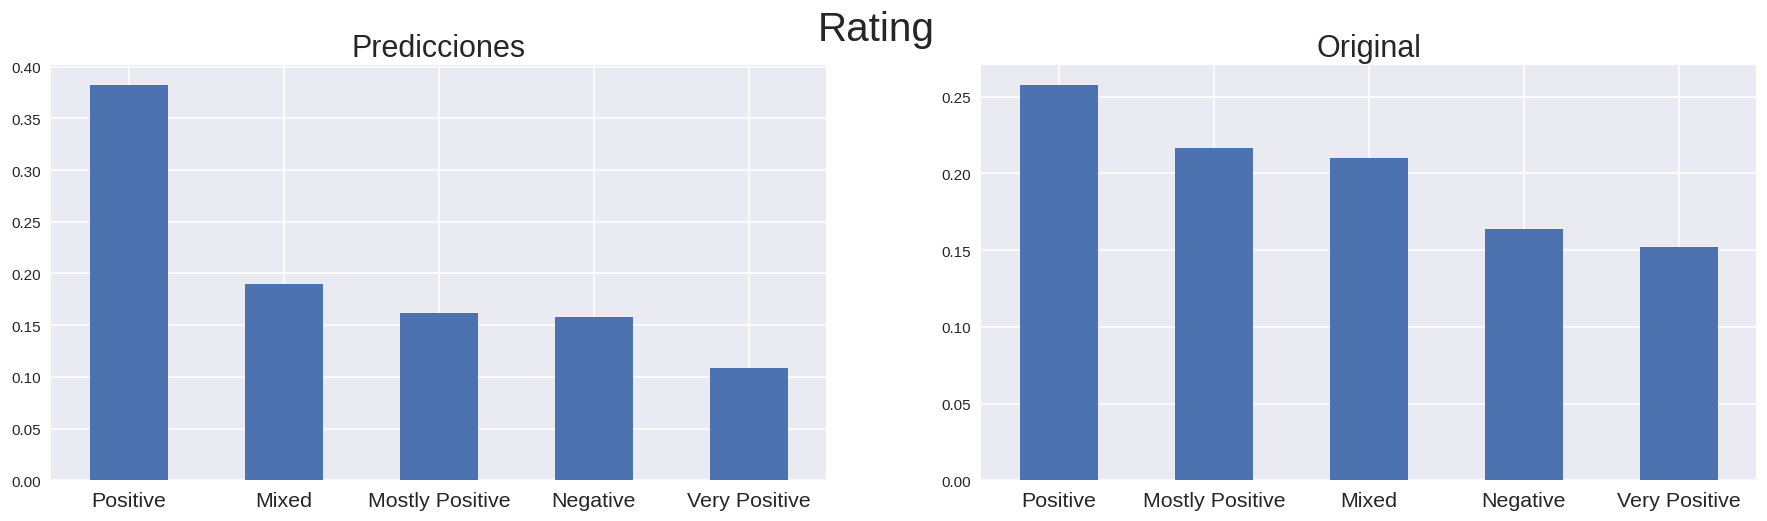

In [ ]:
plt.figure(figsize=(20, 5), dpi=110)
plt.rcParams.update({'font.size': 22})
plt.suptitle("Rating")
plt.subplot(1,2,1)
y_hat_c.value_counts("%").plot(kind="bar");
plt.title("Predicciones", fontsize=20);
plt.xticks(fontsize=14, rotation=0);

plt.subplot(1,2,2)
df_train["rating"].value_counts("%").plot(kind="bar");
plt.title("Original", fontsize=20);
plt.xticks(fontsize=14, rotation=0);

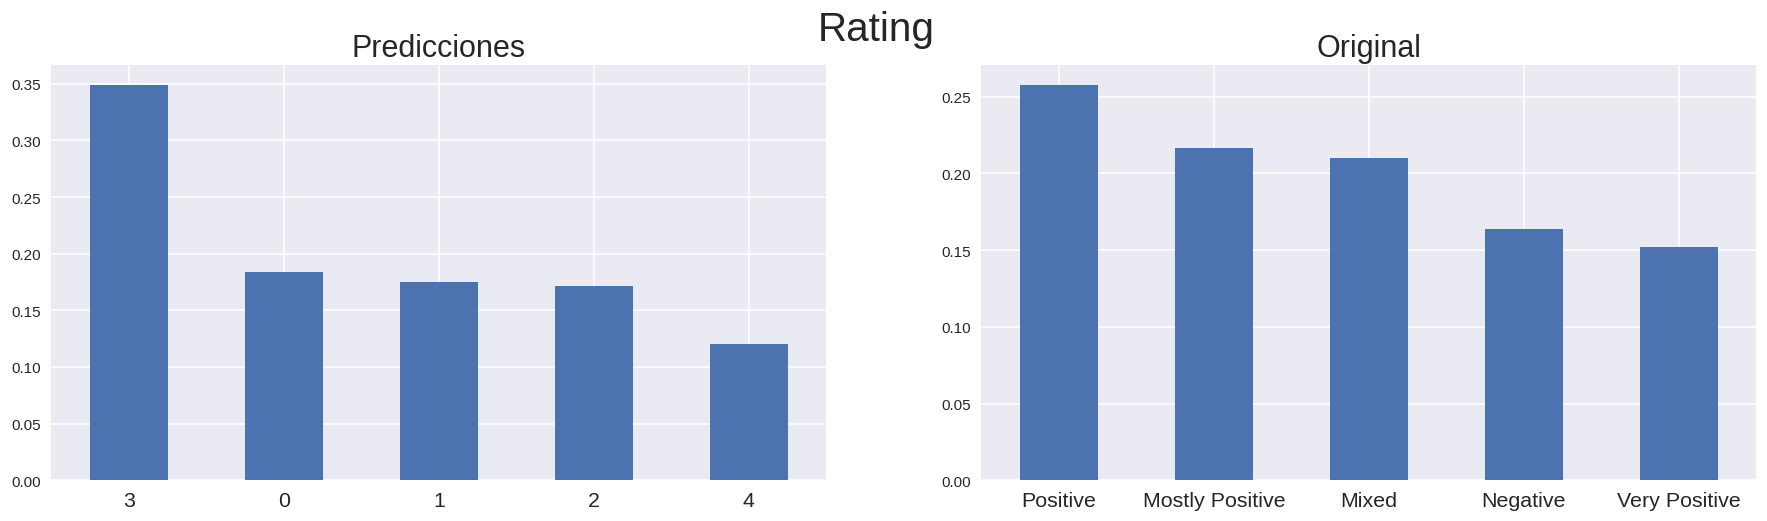

In [ ]:
plt.figure(figsize=(20, 5), dpi=110)
plt.rcParams.update({'font.size': 22})
plt.suptitle("Rating")
plt.subplot(1,2,1)
pd.Series(competencia_clf.predict(df_train)).value_counts("%").plot(kind="bar");
plt.title("Predicciones", fontsize=20);
plt.xticks(fontsize=14, rotation=0);

plt.subplot(1,2,2)
df_train["rating"].value_counts("%").plot(kind="bar");
plt.title("Original", fontsize=20);
plt.xticks(fontsize=14, rotation=0);

In [ ]:
# Mejores resultados regresión, 1er experimento
predictions_rgr_best = pd.read_csv("predictions_rgr.txt", header=None)
predictions_rgr_best.head()

0
0  27574.387
1  10439.790
2  10746.206
3  24982.760
4  54421.504

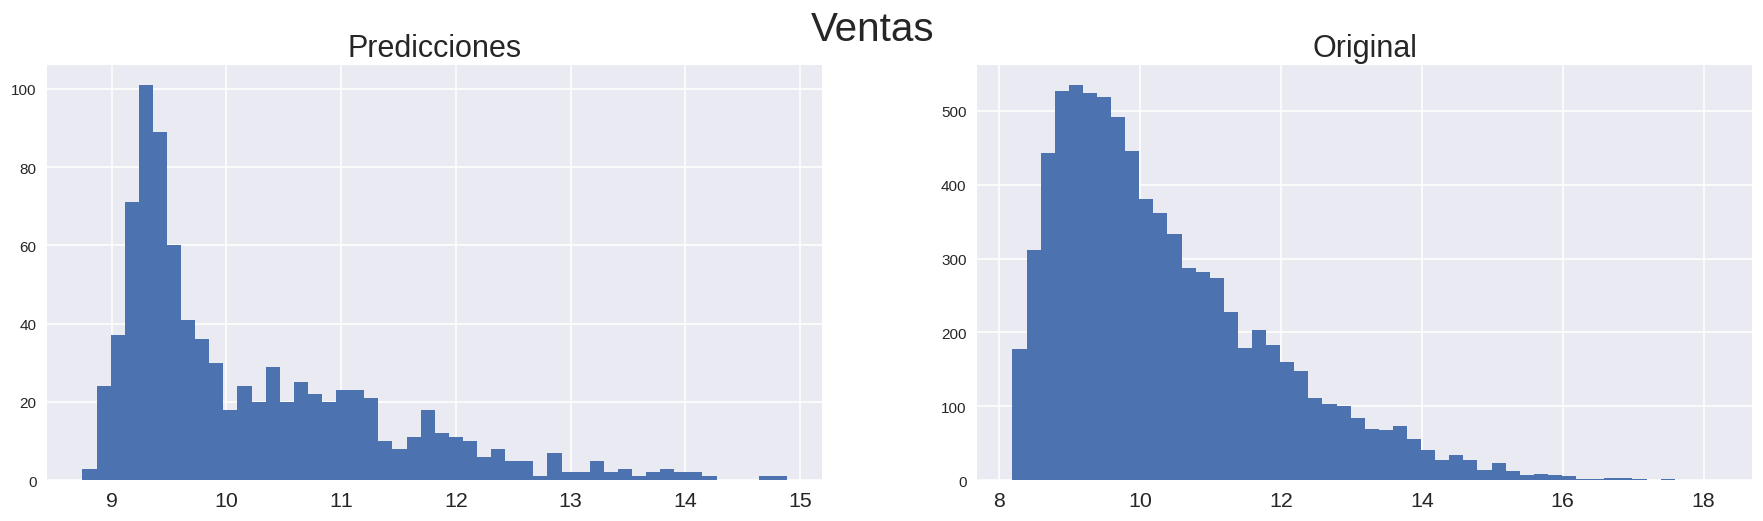

In [ ]:
plt.figure(figsize=(20, 5), dpi=110)
plt.rcParams.update({'font.size': 22})
plt.suptitle("Ventas")
plt.subplot(1,2,1)
plt.hist(pd.Series(np.log(predictions_rgr_best[0] + 0.001)), bins=50);
plt.title("Predicciones", fontsize=20);
plt.xticks(fontsize=14, rotation=0);

plt.subplot(1,2,2)
plt.hist(pd.Series(np.log(df_train["estimated_sells"] + 0.001)), bins=50);
plt.title("Original", fontsize=20);
plt.xticks(fontsize=14, rotation=0);